In [1]:
import numpy as np
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import torch
import torch.nn as nn 
import seaborn as sns
import glob


# In[2]:


import cv2


# In[3]:


!pip install nibabel


# In[4]:


cuda = torch.cuda.is_available()
if cuda:
    print('Cuda Available')
else:
    print('CPU only')


# In[5]:


if torch.cuda.is_available():
    print('GPU is available')
    print('Total GPU memory:', torch.cuda.get_device_properties(0).total_memory)
    print('Allocated GPU memory:', torch.cuda.memory_allocated())
    print('Cached GPU memory:', torch.cuda.memory_reserved())
else:
    print('GPU is not available')


# In[6]:


class Args:
    def __init__(self):
        self.batch_size = 32
        self.log_interval = 10
        self.learning_rate = 1e-2
        self.epochs = 25
        self.train_val_prop = 0.9
        self.epochs = 2
        self.finetuning_epochs = 20
        self.patience = 12 # For early stopping
args = Args()


# In[7]:


import zipfile


# In[8]:


with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall("./extracted_folder")
    


# In[9]:


data_files = glob.glob('data/**/*.nii')
len(data_files)


# In[10]:


files=glob.glob("extracted_folder/**/*.nii.gz")
len(files)


# In[11]:


files[3]


# In[12]:


with zipfile.ZipFile("label.zip","r") as zip_ref:
    zip_ref.extractall("./instancelabel")
    


Cuda Available
GPU is available
Total GPU memory: 51041271808
Allocated GPU memory: 0
Cached GPU memory: 0


In [2]:
lbls=glob.glob("instancelabel/**/*.nii.gz")
len(lbls)


# In[14]:


for i in range(100):
    print(files[i])
    print(lbls[i])

extracted_folder/data/038.nii.gz
instancelabel/label/038.nii.gz
extracted_folder/data/084.nii.gz
instancelabel/label/084.nii.gz
extracted_folder/data/006.nii.gz
instancelabel/label/006.nii.gz
extracted_folder/data/026.nii.gz
instancelabel/label/026.nii.gz
extracted_folder/data/004.nii.gz
instancelabel/label/004.nii.gz
extracted_folder/data/083.nii.gz
instancelabel/label/083.nii.gz
extracted_folder/data/055.nii.gz
instancelabel/label/055.nii.gz
extracted_folder/data/015.nii.gz
instancelabel/label/015.nii.gz
extracted_folder/data/009.nii.gz
instancelabel/label/009.nii.gz
extracted_folder/data/099.nii.gz
instancelabel/label/099.nii.gz
extracted_folder/data/021.nii.gz
instancelabel/label/021.nii.gz
extracted_folder/data/054.nii.gz
instancelabel/label/054.nii.gz
extracted_folder/data/096.nii.gz
instancelabel/label/096.nii.gz
extracted_folder/data/036.nii.gz
instancelabel/label/036.nii.gz
extracted_folder/data/003.nii.gz
instancelabel/label/003.nii.gz
extracted_folder/data/098.nii.gz
instanc

40.0


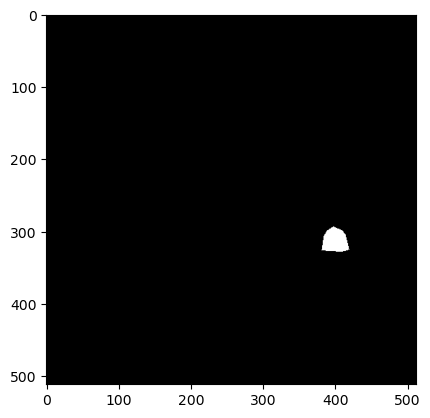

In [3]:
import matplotlib.pyplot as plt
import nibabel as nib
obj=np.zeros((100,512,512,28))
x=np.zeros(100)
for i in range(100):
    obj = nib.load(files[i])
    inf=obj.get_fdata()
    x[i]=inf.shape[2]
    nifti_image = nib.load(files[i])
    img_data = nifti_image.get_fdata()
    # store the image data in the array
    obj = img_data
print(x.max())
i=0
x=[]
y=np.zeros(100)
image_data = np.zeros((100,512,512,40))
for i,file in enumerate(files):
    nifti_image = nib.load(file)
    x= nifti_image.get_fdata()
    s,y,z=x.shape
    for k in range(z):
        image_data[i,:,:,k]=x[:,:,k]
    #image_data[i] 
    i=i+1
#print(image_data.shape)
limg_data=[]
labell=np.zeros((100,512,512,40))
for o,s in enumerate(lbls):
    lnifti_image = nib.load(s)
    limg_data = lnifti_image.get_fdata()
    a,b,c=limg_data.shape
    for i in range(c):
        labell[o,:,:,i]=limg_data[:,:,i]
#print(labell.shape)       
maskdata=np.zeros((100,512,512,32))
imgdata=np.zeros((100,512,512,32))
for i in range(32):
    imgdata[:,:,:,i]=image_data[:,:,:,i]
    maskdata[:,:,:,i]=labell[:,:,:,i]
#print(imgdata.shape)
#print(maskdata.shape)
#for i in range(100):
 #   print(f"{i+1}th patient")
 #   for j in range(32):
  #    plt.imshow(imgdata[i, :, :, j], cmap='gray')
   #   plt.show()

ll=np.zeros((100,512,512,64))
ll=maskdata
plt.imshow(maskdata[0, :, :, 12], cmap='gray')
plt.show()
#for i in range(100):
 #   print(f"{i+1}th patient masks")
  #  for j in range(32):
   #   plt.imshow(maskdata[i, :, :, j], cmap='gray')
    #  plt.show()
     # print(i)
     # print(j)


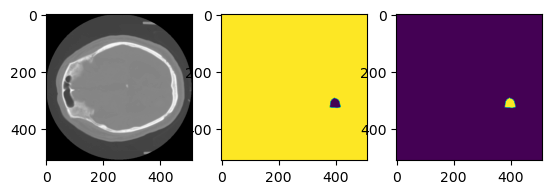

In [4]:
#plt.imshow(ll[0, :, :, 12], cmap='gray')
#plt.show()
#imgdata.resize(100,128,128,32)
#x=np.resize(ll,(100,128,128,32))
#maskdata=maskdata.copy()
#maskdata.resize((100,128,128,32))
#y=np.zeros((100,512,512,32))
#for i in range (100):
 #for j in range (32):
  #  n = maskdata[i,:,:,j].copy()
   # n.resize((512, 512))
    #y[i,:,:,j] = n
#print(y.shape)
#for i in range(100):
 #   print(f"{i+1}th patient masks")
  #  for j in range(32):
   #   plt.imshow(y[i,:,:, j], cmap='gray')
    #  plt.show()




#for i in range(100):
 #   print(f"{i+1}th patient masks")
  #  for j in range(32):
   #   plt.imshow(maskdata[i,:,:, j], cmap='gray')
    #  plt.show()
     # print(i)
      #print(j)
#maskdata.resize(100,128,128,32)
#print(maskdata.shape)
#plt.imshow(x[0, :, :, 12], cmap='gray')
#plt.show()
#print(ll.len)
classification=np.ones((100,32))
labl = np.zeros((100, 2, 512, 512, 32))
labl[:,0,:,:,:][maskdata == 0] = 1
labl[:,1,:,:,:][maskdata == 1] = 1
for i in range (100):
    for j in range (32):
        if np.sum(maskdata[i,  :,:,j]) > 0:
            classification[i][j]=1
        else:
            classification[i][j]=0
# for i in range (100):
#  for j in range (32):
#     if not(labl[i,0,:,:,j].all()):
#         classification[1][i][j]=1
#         classification[0][i][j]=0
      
maskdata=labl     
maskd=labl
subj = 0
plt.subplot(1,3,1)
plt.imshow(imgdata[subj,  :, :, 12], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(maskd[subj, 0, :, :, 12])
plt.subplot(1,3,3)
plt.imshow(maskd[subj, 1, :, :, 12])
plt.show()
#a.resize(new_shape, refcheck=False)
#for i in range(100):
 #   print(f"{i+1}th patient masks")
  #  for j in range(32):
   #   plt.imshow(maskdata[i, 1,:,:, j], cmap='gray')
    #  plt.show()
     # print(i)
      #print(j)

In [9]:
count=0
for i in range (100):
 count=0
 for j in range (32):
    #if labl[i,0,:,:,j].all():
     if classification[i][j]==1:
       
       print(j)
       break

#print(count/3200)


# In[22]:

#print(count)
print(classification.shape)


12
10
10
2
3
15
6
6
16
5
1
21
16
6
12
5
6
5
6
11
12
11
6
11
13
12
12
11
13
0
24
10
9
13
8
10
5
7
11
12
10
5
12
14
7
1
10
13
12
7
9
9
8
7
7
6
2
3
9
10
10
7
12
5
11
10
11
9
13
8
8
4
1
5
10
9
7
11
7
10
13
7
12
10
9
20
6
10
8
13
11
11
3
21
8
12
9
7
5
8
(100, 32)


In [5]:

from torch.utils.data import Dataset
class numpy_dataset(Dataset):  # Inherit from Dataset class
    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).float()
        self.target = torch.from_numpy(target).float()
        self.transform = transform # This is where you can add augmentations

    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]

        if self.transform:
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)

In [7]:
from torchvision import models
dir (models)


# In[116]:


resnet=models.resnet101(pretrained=True)
resnet


# In[117]:


num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 1)
#resnet.train()
#for param in resnet.parameters():
 #   param.requires_grad = False
#for param in resnet.fc.parameters():
 #   param.requires_grad=True
#resnet = nn.Sequential(resnet,nn.Sigmoid())
#if cuda:
 #   resnet.cuda()
#resnet = torch.nn.DataParallel(resnet)
resnet


/home/test/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/test/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
LOAD_PATH = 'ress1111weights'  ###output neuron is 1
resnet = resnet
if cuda:
    resnet.cuda()
model_dict = resnet.state_dict()
pretrained_dict = torch.load(LOAD_PATH)
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
print('weights loaded model = ', len(pretrained_dict), '/', len(model_dict))
resnet.load_state_dict(torch.load(LOAD_PATH))

weights loaded model =  626 / 626


<All keys matched successfully>

In [9]:
if cuda:
    resnet.cuda()
resnet = torch.nn.DataParallel(resnet)

In [10]:
import torch.optim as optim
criterionn = nn.BCELoss()
optimizerr = optim.SGD(resnet.parameters(), lr=0.0001, momentum=0.9)

In [11]:
cimgdata= np.concatenate([imgdata[i,:,:,:] for i in range(100)], axis=2)


# In[125]:


print(cimgdata.shape)


# In[126]:


cclassification=np.concatenate([classification[i,:] for i in range(100)],axis=0)


# In[127]:


cimgdata.shape


# In[128]:


cimgdata=cimgdata.transpose((2,0,1))


# In[129]:


cimgdata.shape


# In[130]:


cclassification.shape


# In[131]:


#for i in range(96):
 #   plt.imshow(cimgdata[i,:,:],cmap='gray')
  #  plt.show()


# In[132]:


from torchvision import  transforms
#preprocess=transforms.Compose([transforms.Resize(512),transforms.CenterCrop(512),transforms.ToTensor(),transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])])


# In[133]:


from PIL import Image


# In[134]:


xx=np.zeros((3200,512,512,3))


# In[135]:


cimgdata.shape



(512, 512, 3200)


(3200, 512, 512)

In [ ]:
unetdata=cimgdata
unetdata.shape

In [ ]:
unetdata=unetdata.reshape(3200,1,512,512)
unetdata.shape

In [ ]:
max_val=unetdata.max()
min_val=unetdata.min()

In [ ]:
unetdata = (unetdata - min_val) / (max_val - min_val)

In [ ]:
unetdata.min()

(512, 512, 3)


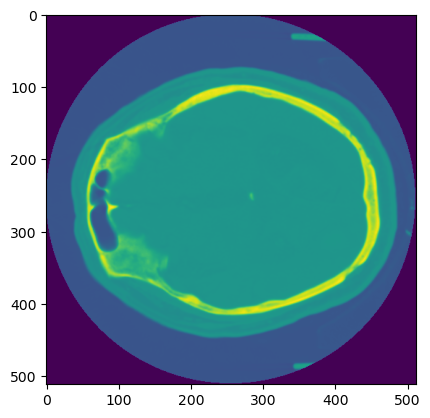

In [12]:
y=cimgdata[12,:,:]
plt.imshow(y)
y.shape
z = Image.fromarray(y, 'RGB')
yy = (y).astype(np.uint8)
image_rgb = cv2.cvtColor(yy, cv2.COLOR_GRAY2RGB)


# In[138]:


#z=cv2.resize(y,(3,512,512))
#plt.imshow(image_rgb[:,:,0],cmap='gray')
print(image_rgb.shape)


# In[139]:


rimg_data=np.zeros((3200,512,512,3))
for i in range (3200):
 # cimgdata[i] = cimgdata[i,:,:].convert('RGB')
 # Image.fromarray(cimgdata[i,:,:], 'RGB')
    yy = cimgdata[i,:,:].astype(np.uint8)
    rimg_data[i,:,:,:] = cv2.cvtColor(yy, cv2.COLOR_GRAY2RGB)


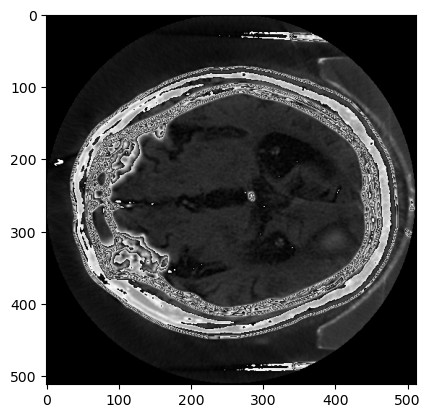

In [13]:
plt.imshow(rimg_data[12,:,:,2],cmap='gray')


In [14]:
print(rimg_data.shape)
cimgdata=rimg_data.transpose(0,3,1,2)
print(cimgdata.shape)

(3200, 512, 512, 3)
(3200, 3, 512, 512)


In [15]:
#threshold_value = 0.4
#print(cimgdata[12,0,:,:].max())
#plt.imshow(cimgdata[12,0,:,:])
#plt.show()
# Apply thresholding
#for i in range(3200):
 #for j in range(3):
  #thresholded_img = np.array(cimgdata[i,j,:,:])
  #thresholded_img[thresholded_img > threshold_value] = 1
  #thresholded_img[thresholded_img <= threshold_value] = 0
  #thresholded_img=(1-thresholded_img)*cimgdata[i,j,:,:]
  #cimgdata[i,j,:,:]=thresholded_img*255

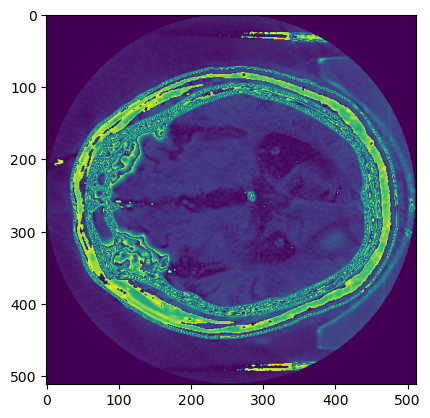

1.0
(3200, 3, 512, 512)


In [16]:
y=cimgdata[12,0,:,:]
plt.imshow(y)
plt.show()
#print(y.shape)
#z = Image.fromarray(y, 'RGB')
#yy = (y).astype(np.uint8)
#image_rgb = cv2.cvtColor(yy, cv2.COLOR_GRAY2RGB)
print(cclassification[12])


# In[143]:


print(cimgdata.shape)
np.amax(cimgdata[12,:,:])


# In[144]:


cmg=torch.from_numpy(cimgdata)


In [17]:
np.amax(cimgdata[12,:,:])

255.0

In [18]:
Xtrain = cimgdata[0:2240]
Xval = cimgdata[2240:2560]
Xtest=cimgdata[2560:]
ytrain=cclassification[0:2240]
yval=cclassification[2240:2560]
ytest=cclassification[2560:]


# In[148]:


print(cimgdata.shape)

(3200, 3, 512, 512)


In [ ]:
plt.imshow(Xtrain[12,0,:,:])


In [19]:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)

from torch.utils.data import DataLoader

# In[151]:


train_dataset = numpy_dataset(Xtrain, ytrain)
val_dataset = numpy_dataset(Xval, yval)
print(len(train_dataset))


# In[152]:


test_dataset = numpy_dataset(Xtest, ytest)
test_dataloader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=True)


# In[153]:


#train_dataset = numpy_dataset(stacked_data, y)
train_dataloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=True)
print(len(train_dataloader))

(2240, 3, 512, 512) (2240,)
(320, 3, 512, 512) (320,)
2240
70


In [ ]:
resnet.train()


In [ ]:
from torch.autograd import Variable
MODEL_PATH = 'models/'

# Initialise early stopping
#early_stopping = EarlyStoppingModelCheckpointing(args.patience, verbose=False)
args.epochs = 200
loss_store = []
for epoch in range(1, args.epochs+1):
    print('Epoch ', epoch, '/', args.epochs, flush=True)
    # First train 
    total_loss=0
    val_total_loss=0
    resnet.train()     
    batches = 0
    for batch_idx, (data, label) in enumerate(train_dataloader):
        label=np.reshape(label,(32,1))
        if cuda:
            data = data.cuda()
            label = label.cuda()
        data = Variable(data)
        label = Variable(label)            
        batches += 1
        # Forward
        optimizerr.zero_grad()
        seg_pred = resnet.forward(data)
        # Calc loss
       # y=np.reshape(seg_pred,(4))
       # print(label.shape)
        train_loss = criterionn(torch.sigmoid(seg_pred), label)
        train_loss.backward()
        optimizerr.step()
        total_loss += train_loss
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(data), len(train_dataloader.dataset),
                       100. * (batch_idx+1) / len(train_dataloader), train_loss.item()), flush=True)
    av_loss = (total_loss / batches).detach().cpu().numpy()   
    print('Training set: Average loss:',  av_loss,flush=True) 
    resnet.eval()
    batches = 0 
    with torch.no_grad():
        for batch_idx, (data, label) in enumerate(val_dataloader):
            label=np.reshape(label,(32,1))
            if cuda:
                data = data.cuda()
                label = label.cuda()
            data = Variable(data)
            label = Variable(label)
            batches += 1
            pred_seg = resnet.forward(data)
           # print(label)
            #print(torch.sigmoid(pred_seg))
            loss = criterionn(torch.sigmoid(pred_seg), label)
            val_total_loss += loss
    val_av_loss=(val_total_loss / batches).detach().cpu().numpy()
    print('Validation set: Average loss: ',  val_av_loss, flush=True)
    loss_store.append([av_loss, val_av_loss])
    if epoch==20:
        torch.save(resnet.state_dict(), 'fresnett20weights')
    if epoch==30:
        torch.save(resnet.state_dict(), 'fresnett30weights')
    if epoch==35:
        torch.save(resnet.state_dict(), 'fresnett35weights')
    if epoch==40:
        torch.save(resnet.state_dict(), 'fresnett40weights')
    if epoch==45:
        torch.save(resnet.state_dict(), 'fresnett45weights')
    if epoch==50:
        torch.save(resnet.state_dict(), 'fresnett50weights')
    if epoch==55:
        torch.save(resnet.state_dict(), 'fresnett55weights')
    if epoch==60:
        torch.save(resnet.state_dict(), 'fresnett60weights')
    if epoch==65:
        torch.save(resnet.state_dict(), 'fresnett65weights')
    if epoch==70:
        torch.save(resnet.state_dict(), 'fresnett70weights')
    if epoch==75:
        torch.save(resnet.state_dict(), 'fresnett75weights')
    if epoch==80:
        torch.save(resnet.state_dict(), 'fresnett80weights')
    if epoch==85:
        torch.save(resnet.state_dict(), 'fresnett85weights')
    if epoch==90:
        torch.save(resnet.state_dict(), 'fresnett90weights')
    if epoch==95:
        torch.save(resnet.state_dict(), 'fresnett95weights')
 #   early_stopping(val_av_loss, val_dice_accuracy, best_val_dice_accuracy, class_model, epoch, optimizer, av_loss, MODEL_PATH)
        
  #  if val_dice_accuracy > best_val_dice_accuracy:
   #     best_val_dice_accuracy = val_dice_accuracy
        
    #if early_stopping.early_stop: # Okay, when the patience is reached and early_stop flag is True, we stop training.
     #   loss_store = np.array(loss_store)
#         np.save(LOSS_PATH, loss_store)
      #  break
        # If you want the system to terminate at this point, you can use sys.exit; very handy when running 
        # codes in clusters
       # sys.exit('Patience Reached - Early Stopping Activated')
    torch.cuda.empty_cache()  
torch.save(resnet.state_dict(), 'res1111weights')

In [ ]:
torch.save(resnet.state_dict(), 'ress1111weights')

In [20]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
resnet.eval()
count=0
newlab=np.zeros(2240)
with torch.no_grad():
    for e, (data, label) in enumerate(train_dataloader):
        label=np.reshape(label,(32,1))
        count=count+1
        labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        label = Variable(label)
        print(label)
        preds = resnet.forward(data)
        for i in range(32):
            newlab[32*e+i]=torch.sigmoid(preds[i])
            #print(preds[i])
        print(torch.sigmoid(preds))
        results.append(preds.detach().cpu().numpy())
        loss = criterionn(torch.sigmoid(preds), label)
        val_tl += loss
    valav=(val_tl / 20).detach().cpu().numpy()
    print('Validation set: Average loss: ',  valav, flush=True)
    print(count)
    #loss_store.append([av_loss, val_av_loss])   
    torch.cuda.empty_cache()  



tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')
tensor([[0.0171],
        [0.0182],
        [0.0496],
        [0.0116],
        [0.0354],
        [0.0227],
        [0.0198],
        [0.0275],
        [0.1196],
        [0.0443],
        [0.0301],
        [0.0377],
        [0.9958],
        [0.9951],
        [0.9708],
        [0.9824],
        [0.9871],
        [0.0294],
        [0.0518],
        [0.1055],
        [0.0104],
        [0.0093],
        [0.0381],
        [0.0103],
        [0.0098],
        [0.0048],
        [0.0045],
        [0.0050],
        [0.0035],
        [0.0

In [ ]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
resnet.eval()
count=0
vnewlab=np.zeros(2240)
with torch.no_grad():
    for e, (data, label) in enumerate(val_dataloader):
        label=np.reshape(label,(32,1))
        count=count+1
        labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        label = Variable(label)
        print(label)
        preds = resnet.forward(data)
        for i in range(32):
            vnewlab[32*e+i]=torch.sigmoid(preds[i])
            #print(preds[i])
        print(torch.sigmoid(preds))
        results.append(preds.detach().cpu().numpy())
        loss = criterionn(torch.sigmoid(preds), label)
        val_tl += loss
    valav=(val_tl / 20).detach().cpu().numpy()
    print('Validation set: Average loss: ',  valav, flush=True)
    print(count)
    #loss_store.append([av_loss, val_av_loss])   
    torch.cuda.empty_cache()  



In [21]:
count=0
for i in range(2240):
    if newlab[i]>=0.5:
     count=count+1
count

638

In [22]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
resnet.eval()
count=0
tempp=0
with torch.no_grad():
    for (data, label) in train_dataloader:
        label=np.reshape(label,(32,1))
        labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        label = Variable(label)
        print(label)
        preds = resnet.forward(data)
        print(torch.sigmoid(preds))
        for i in range (32):
         u=torch.round(torch.sigmoid(preds[i]))
         if label[i]==1:
          tempp=tempp+1
          if u==label[i]:
            count=count+1
        results.append(preds.detach().cpu().numpy())
        loss = criterionn(torch.sigmoid(preds), label)
        val_tl += loss
    valav=(val_tl / 20).detach().cpu().numpy()
    print('Validation set: Average loss: ',  valav, flush=True)
    print(tempp)
    #loss_store.append([av_loss, val_av_loss])   
    torch.cuda.empty_cache()  
    print(count)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')
tensor([[0.0171],
        [0.0182],
        [0.0496],
        [0.0116],
        [0.0354],
        [0.0227],
        [0.0198],
        [0.0275],
        [0.1196],
        [0.0443],
        [0.0301],
        [0.0377],
        [0.9958],
        [0.9951],
        [0.9708],
        [0.9824],
        [0.9871],
        [0.0294],
        [0.0518],
        [0.1055],
        [0.0104],
        [0.0093],
        [0.0381],
        [0.0103],
        [0.0098],
        [0.0048],
        [0.0045],
        [0.0050],
        [0.0035],
        [0.0

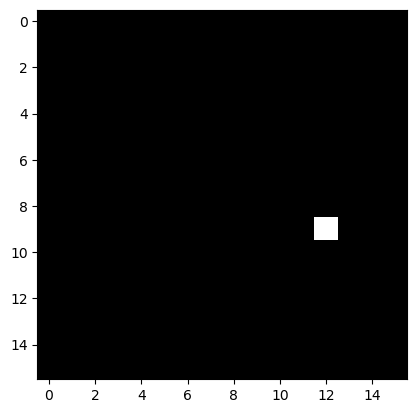

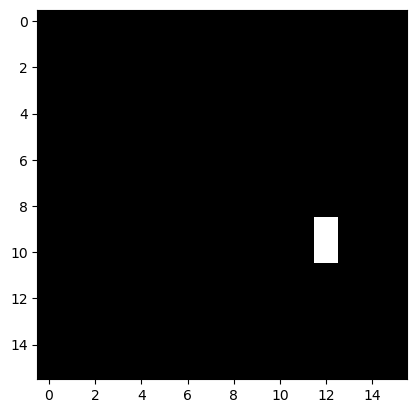

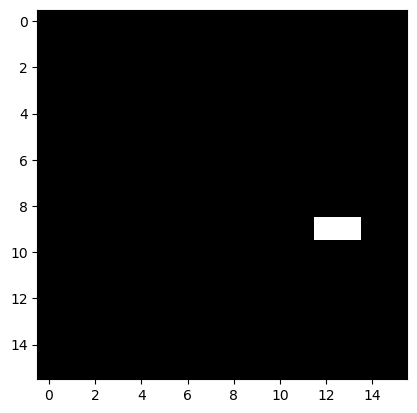

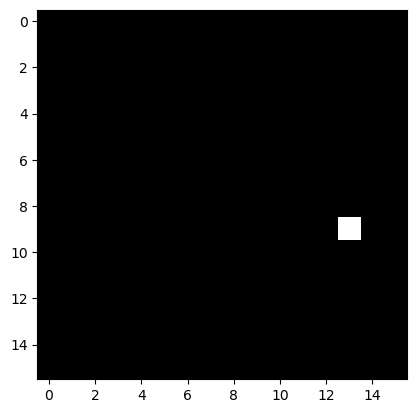

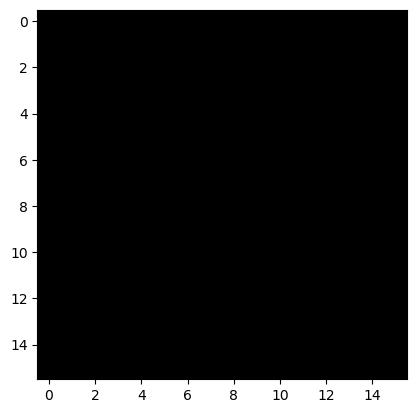

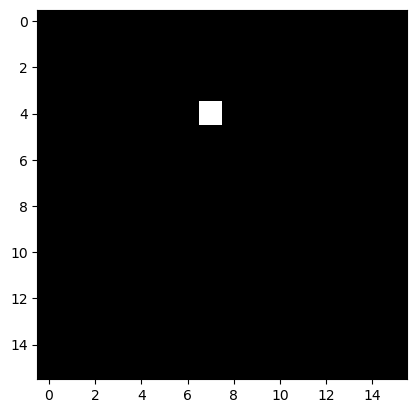

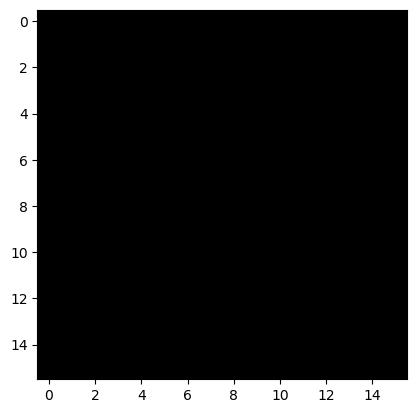

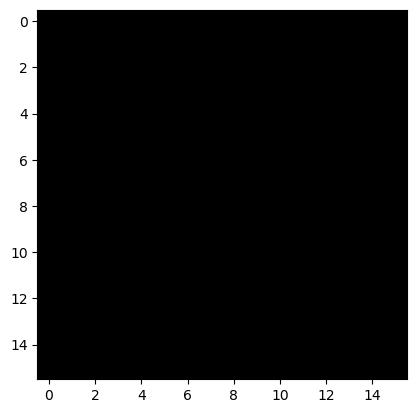

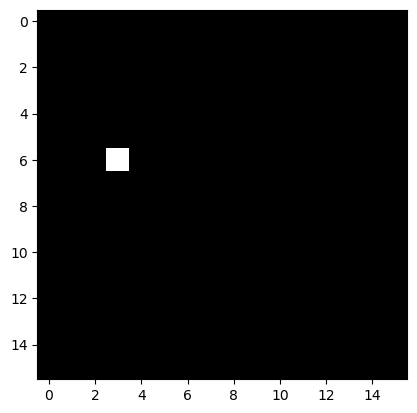

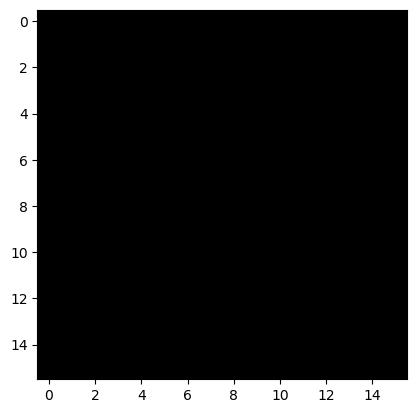

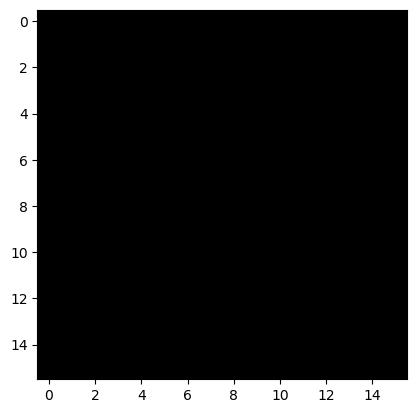

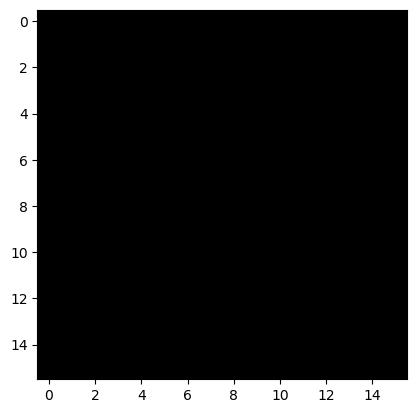

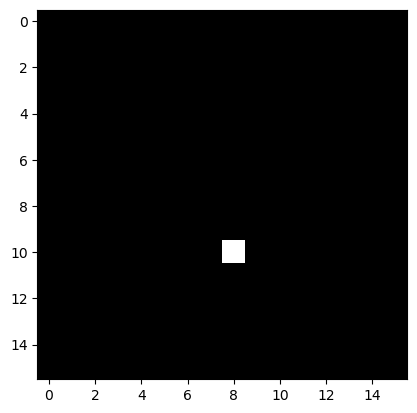

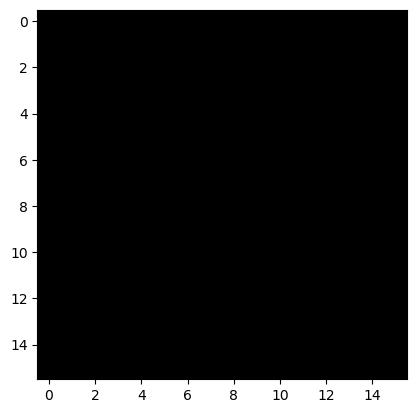

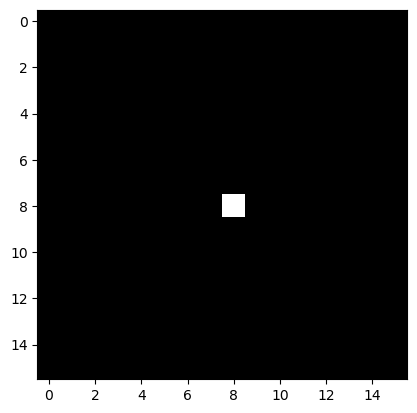

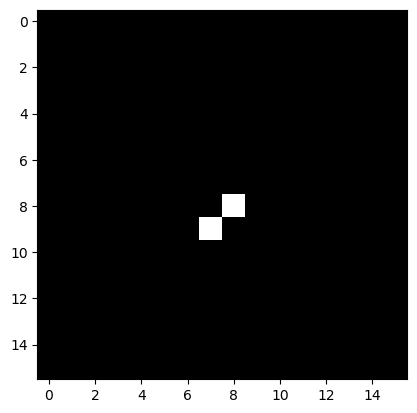

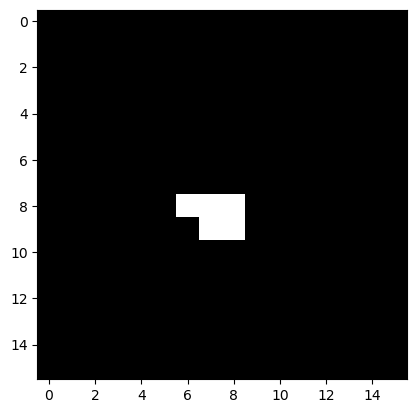

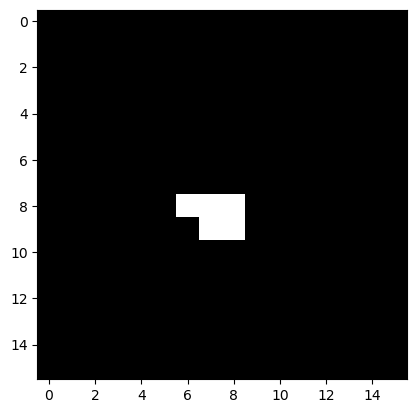

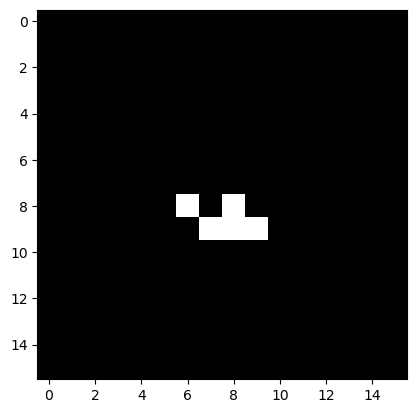

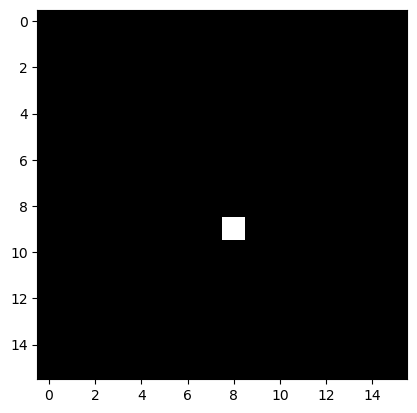

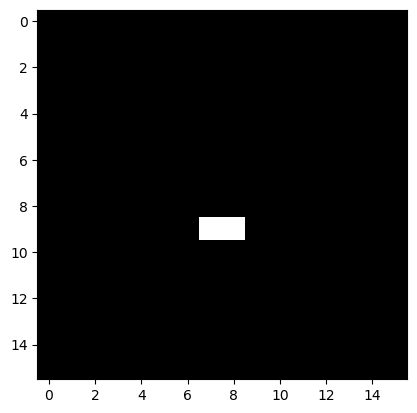

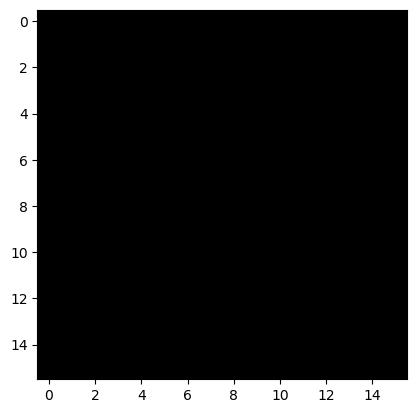

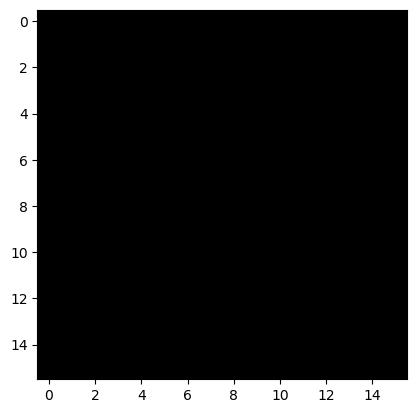

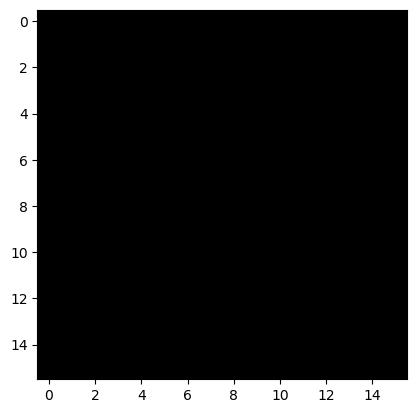

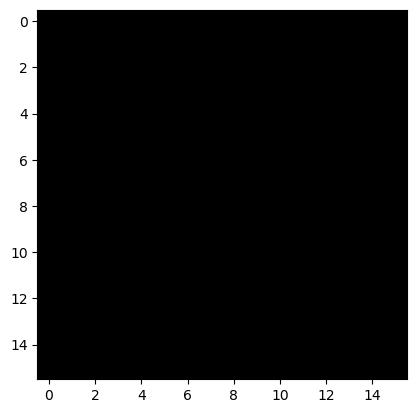

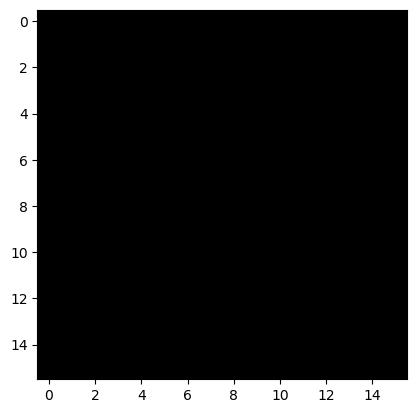

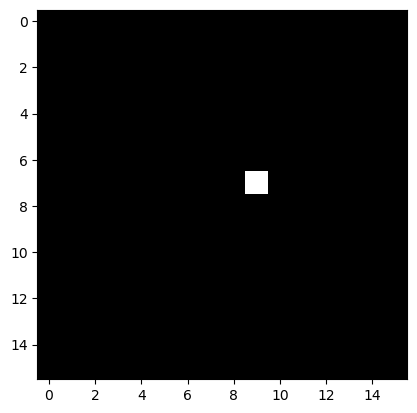

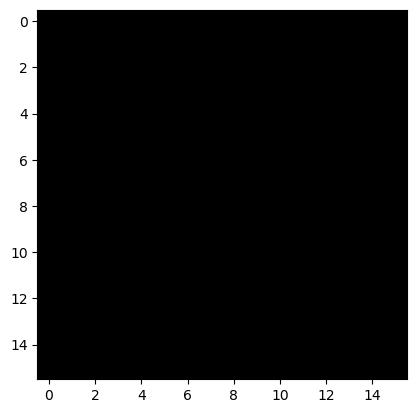

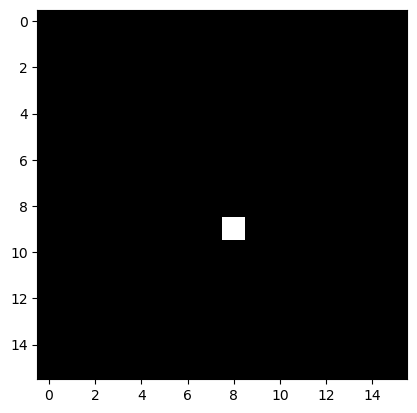

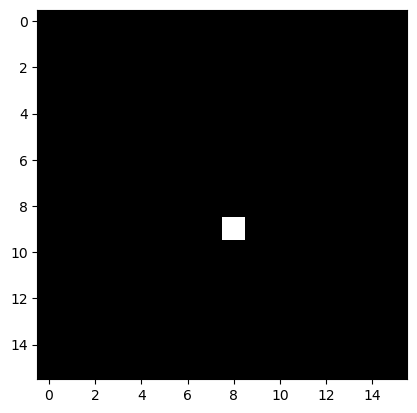

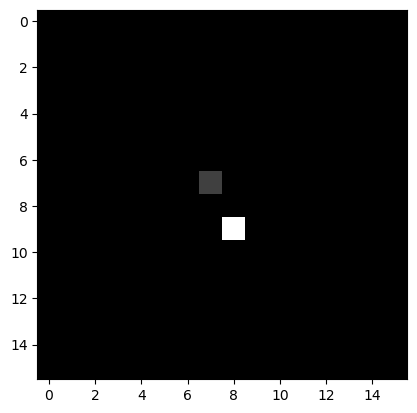

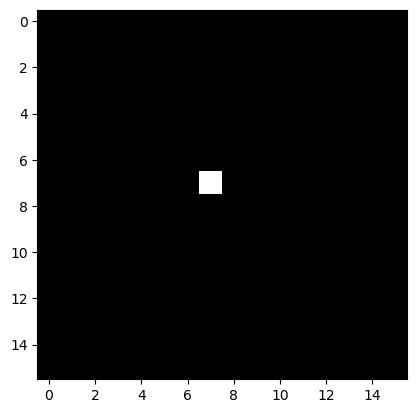

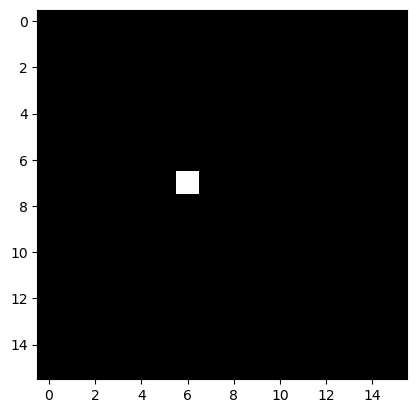

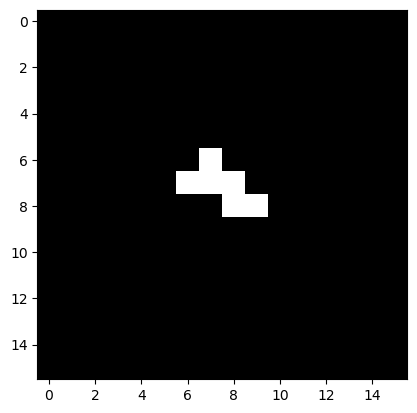

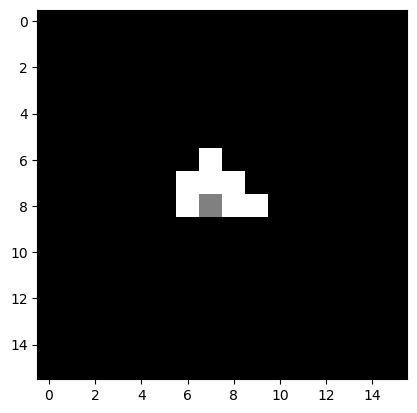

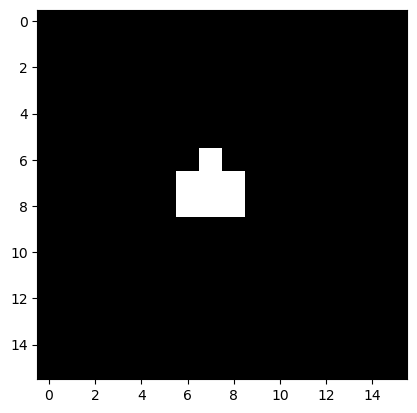

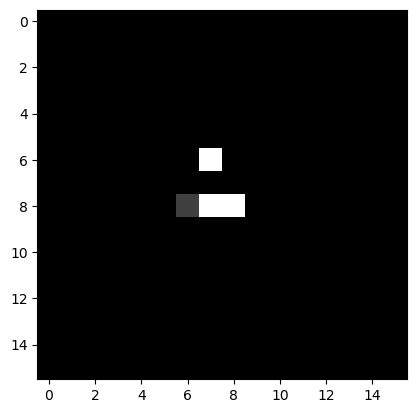

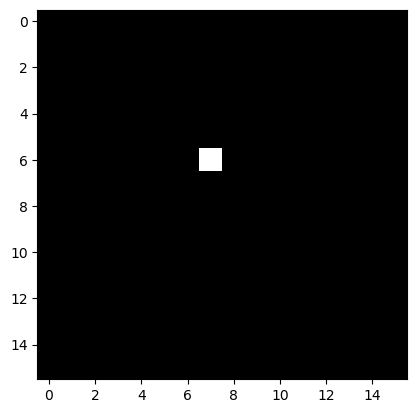

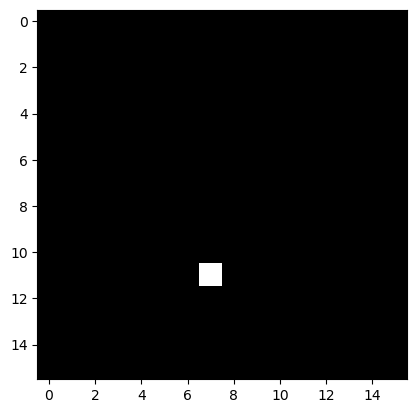

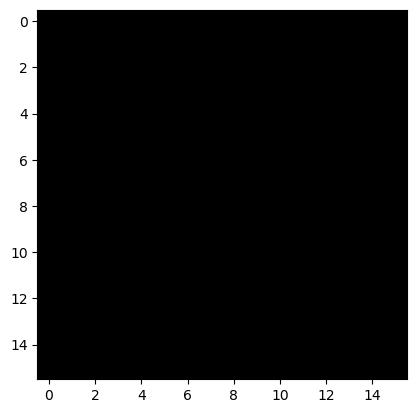

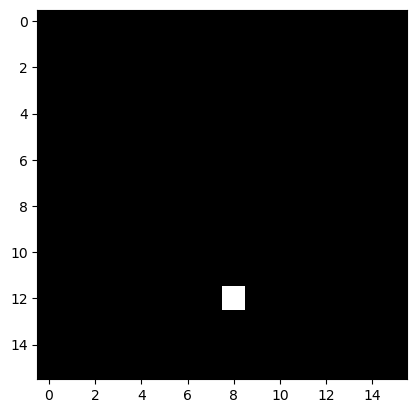

KeyboardInterrupt: 

In [19]:
counttt=0
for i in range(0,70):

 #   print(f"{i+1}th patient masks")
    for j in range(32):
     if np.sum(maskd[i,  1,:,:,j]) > 0:
      counttt=counttt+1
      iii=cv2.resize(maskdata[i,1,:,:,j],(16,16))
      plt.imshow(iii, cmap='gray')
      plt.show()
     # print(i)
      #print(j)
print(counttt)

In [ ]:
counttt=0
for i in range(0,70):
 #   print(f"{i+1}th patient masks")
    for j in range(32):
     if np.sum(maskd[i,  1,:,:,j]) > 0:
      counttt=counttt+1
      #iii=cv2.resize(maskdata[i,1,:,:,j],)
      plt.imshow(maskdata[i,1,:,:,j], cmap='gray')
      plt.show()
     # print(i)
      #print(j)
print(counttt)

In [20]:
resnet=resnet.module
# In[74]:
camw=resnet.fc.weight
camw=camw.reshape(2048)

In [21]:
print(camw.shape)
# In[76]:
camw=camw.detach().cpu().numpy()


torch.Size([2048])


In [22]:
new_res = torch.nn.Sequential(*list(resnet.children())[:-2])

In [23]:
new_res

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [24]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
new_res.eval()
count=0
countt=0
uu=[]
f=0
with torch.no_grad():
    for (data, label) in train_dataloader:
 #       print(label)
       # for i in range(32):
        # plt.imshow(data[i,0,:,:])
        # plt.show()
        #label=np.reshape(label,(32,1))
        #labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        #label = Variable(label)
        preds = new_res.forward(data)
       # print(preds)
   #     print(preds.shape)
        n=preds.detach().cpu().numpy()
       # plt.imshow(n)
        #plt.show()
        #f=data.detach().cpu.numpy()
        results.append(preds.detach().cpu().numpy())
        f=data.cpu().numpy()
        t=np.zeros((32,1,16,16))
        for i in range(32):
        # if label[i]==1:
            countt=countt+1
            for j in range(2048):
                # print(camw[j].shape)
             
                 #g=n[i,j,:,:]*camw[j]
                 #print(g.shape)
                 #print(t[i,0,:,:].shape)
                 #print(n[i,j,:,:].shape)
                 t[i,0,:,:]=t[i,0,:,:]+n[i,j,:,:]*camw[j]
                 #plt.imshow(n[i,j,:,:])
                 #plt.show()
          #  plt.imshow(t[i,0,:,:])
          #  plt.show()
            uu.append(t[i,0,:,:].max())
          #  plt.imshow(f[i,0,:,:],cmap='gray')
           # plt.show()
            import matplotlib.pyplot as plt

# create a figure with two subplots
         #   fig, axs = plt.subplots(1, 2)

# plot the first image on the first subplot
          #  image = cv2.resize(t[i,0,:,:], (512,512))
           # axs[0].imshow(image)

            #axs[0].set_title('Image 1')

         #   print(image.shape)
            
    
# plot the second image on the second subplot
            #axs[1].imshow(f[i,0,:,:], cmap='gray')
 
            #axs[1].set_title('Image 2')

# display the figure
            #plt.show()
            

        #loss = criterionn(torch.sigmoid(preds), label)
        #for i in range (32):
         #print(torch.sigmoid(preds[i]))
         #print(label[i])
         #binary_preds = torch.round(torch.sigmoid(preds[i]))
         ##print(binary_preds)
         #if binary_preds==label[i]:
          #count=count+1
        #val_tl += loss
 
        #print(binary_preds)
        #label = label.float()
# Calculate accuracy
        #accuracy = torch.mean(binary_preds == label) 
        #f=f+accuracy
   
    #print("accuracy",f)
    #print(count/2560)
    #valav=(val_tl / 80).detach().cpu().numpy()
    #print('Validation set: Average loss: ',  valav, flush=True)
    #print(count)
    #loss_store.append([av_loss, val_av_loss])   
    #torch.cuda.empty_cache()  
print(countt)

2240


In [ ]:
max(uu)

In [ ]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
new_res.eval()
count=0
countt=0
f=0
with torch.no_grad():
    for e, (data, label) in enumerate(test_dataloader):
        print(label)
       # for i in range(32):
        # plt.imshow(data[i,0,:,:])
        # plt.show()
        #label=np.reshape(label,(32,1))
        #labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        #label = Variable(label)
        preds = new_res.forward(data)

        n=preds.detach().cpu().numpy()
       # plt.imshow(n)
        #plt.show()
        #f=data.detach().cpu.numpy()
        results.append(preds.detach().cpu().numpy())
        f=data.cpu().numpy()
        t=np.zeros((32,1,16,16))
        for i in range(32):
         if label[i]==1:
            

            countt=countt+1
            for j in range(2048):
                # print(camw[j].shape)
             
                 #g=n[i,j,:,:]*camw[j]
                 #print(g.shape)
                 #print(t[i,0,:,:].shape)
                 #print(n[i,j,:,:].shape)
                 t[i,0,:,:]=t[i,0,:,:]+n[i,j,:,:]*camw[j]
                 #plt.imshow(n[i,j,:,:])
                 #plt.show()
            #plt.imshow(t[i,0,:,:])
            #plt.show()
            #plt.imshow(f[i,0,:,:],cmap='gray')
            #plt.show()
            #import matplotlib.pyplot as plt

# create a figure with two subplots
            fig, axs = plt.subplots(1, 2)

# plot the first image on the first subplot
            image = cv2.resize(t[i,0,:,:], (512,512))
            axs[0].imshow(image)

            #axs[0].set_title('Image 1')

            print(image.shape)
            
    
# plot the second image on the second subplot
            axs[1].imshow(f[i,0,:,:], cmap='gray')
 
            #axs[1].set_title('Image 2')

# display the figure
            plt.show()
       #     plt.imshow(maskdata[e,1,:,:,i])
       #     plt.show()
            

        #loss = criterionn(torch.sigmoid(preds), label)
        #for i in range (32):
         #print(torch.sigmoid(preds[i]))
         #print(label[i])
         #binary_preds = torch.round(torch.sigmoid(preds[i]))
         ##print(binary_preds)
         #if binary_preds==label[i]:
          #count=count+1
        #val_tl += loss
 
        #print(binary_preds)
        #label = label.float()
# Calculate accuracy
        #accuracy = torch.mean(binary_preds == label) 
        #f=f+accuracy
   
    #print("accuracy",f)
    #print(count/2560)
    #valav=(val_tl / 80).detach().cpu().numpy()
    #print('Validation set: Average loss: ',  valav, flush=True)
    #print(count)
    #loss_store.append([av_loss, val_av_loss])   
    #torch.cuda.empty_cache()  
print(countt)

In [25]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
new_res.eval()
count=0
countt=0
f=0
clus=np.zeros((2240,1,512,512))
with torch.no_grad():

    for e, (data, label) in enumerate(train_dataloader):
       # print(label)
       # for i in range(32):
        # plt.imshow(data[i,0,:,:])
        # plt.show()
        #label=np.reshape(label,(32,1))
        #labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        #label = Variable(label)
        preds = new_res.forward(data)
       # print(preds.shape)
        n=preds.detach().cpu().numpy()
       # plt.imshow(n)
        #plt.show()
        #f=data.detach().cpu.numpy()
        results.append(preds.detach().cpu().numpy())
        f=data.cpu().numpy()
        t=np.zeros((32,1,16,16))
        for i in range(32):
         if label[i]==1:
            countt=countt+1
            for j in range(2048):
                # print(camw[j].shape)
             
                 #g=n[i,j,:,:]*camw[j]
                 #print(g.shape)
                 #print(t[i,0,:,:].shape)
                 #print(n[i,j,:,:].shape)
                 t[i,0,:,:]=t[i,0,:,:]+n[i,j,:,:]*camw[j]
                 #plt.imshow(n[i,j,:,:])
                 #plt.show()
            #plt.imshow(t[i,0,:,:])
            #plt.show()
            #plt.imshow(f[i,0,:,:],cmap='gray')
            #plt.show()
            #import matplotlib.pyplot as plt

# create a figure with two subplots
# plot the first image on the first subplot
            image = cv2.resize(t[i,0,:,:], (512,512))
            min_val = np.min(image)
            max_val = np.max(image)
            normalized_img = (image - min_val) / (max_val - min_val)
         #   normalized_img=image/128.62

         #   plt.imshow(normalized_img)
        #    plt.colorbar()
            #axs[0].set_title('Image 1')

           # print(image.shape)
            
    
# plot the second image on the second subplot
          #  plt.imshow(f[i,0,:,:], cmap='gray')
 
            #axs[1].set_title('Image 2')

# display the figure
           # plt.show()
            threshold_value = 0.7

# Apply thresholding
            thresholded_img = np.array(normalized_img)
            thresholded_img[thresholded_img > threshold_value] = 1
            thresholded_img[thresholded_img <= threshold_value] = 0
        #    plt.imshow(thresholded_img)
           # plt.show()
            clus[32*e+i,0,:,:]=thresholded_img*f[i,0,:,:]
         #   print(f[i,0,:,:].shape)
         #   print(pp.shape)
          #  plt.imshow(pp)
          #  plt.show()

        #loss = criterionn(torch.sigmoid(preds), label)
        #for i in range (32):
         #print(torch.sigmoid(preds[i]))
         #print(label[i])
         #binary_preds = torch.round(torch.sigmoid(preds[i]))
         ##print(binary_preds)
         #if binary_preds==label[i]:
          #count=count+1
        #val_tl += loss
 
        #print(binary_preds)
        #label = label.float()
# Calculate accuracy
        #accuracy = torch.mean(binary_preds == label) 
        #f=f+accuracy
   
    #print("accuracy",f)
    #print(count/2560)
    #valav=(val_tl / 80).detach().cpu().numpy()
    #print('Validation set: Average loss: ',  valav, flush=True)
    #print(count)
    #loss_store.append([av_loss, val_av_loss])   
    #torch.cuda.empty_cache()  
print(countt)

645


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances_argmin_min
from PIL import Image

def image_segmentation(image_path, n_colors):
    # Load the image
    # Convert the image to a numpy array
    # Reshape the image array to 2D
    # Normalize the pixel values to the range [0, 1

    # Shuffle the data to ensure better convergence
    shuffled_data = shuffle(image_data, random_state=0)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_colors, random_state=0)
    kmeans.fit(shuffled_data)

    # Get the labels for all pixels
    labels = kmeans.predict(image_data)

    # Get the RGB values for the cluster centers
    colors = kmeans.cluster_centers_

    # Assign the cluster center colors to the corresponding pixels
    segmented_image = colors[labels]
    segmented_image = segmented_image.reshape(np_image.shape)

    # Convert the segmented image array back to PIL Image
    segmented_image = Image.fromarray((segmented_image * 255).astype(np.uint8))

    return segmented_image

# Example usage
image_path = "path/to/your/image.jpg"
n_colors = 5
segmented_image = image_segmentation(image_path, n_colors)
segmented_image.show()


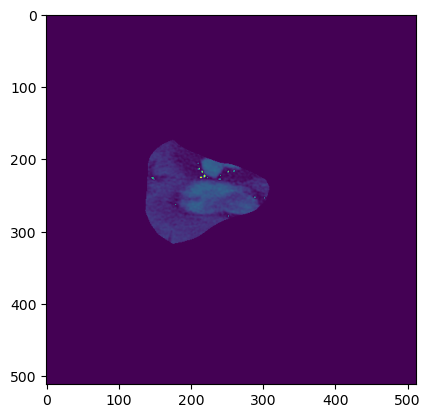

In [29]:
plt.imshow(clus[112,0,:,:])

(512, 512)


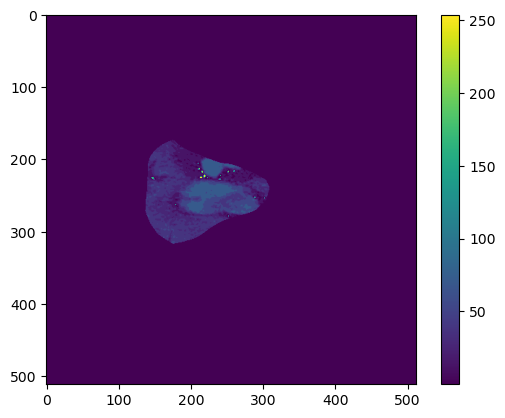

In [26]:
y=clus[112,0,:,:]
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


    # Load the image


    # Normalize the pixel values to the range [0, 1]


    # Shuffle the data to ensure better convergence
#shuffled_data = shuffle(image_data, random_state=0)

kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(y.reshape(-1, 1))

# Get the labels for all pixels
labels = kmeans.labels_.reshape(y.shape)


cluster_colors = kmeans.cluster_centers_
print(labels.shape)
    # Create a color map based on cluster labels
cluster_map = cluster_colors[labels]


        
    # Reshape the cluster map to the shape of the original image
#cluster_map = cluster_map.reshape(image.shape)
    # Display the segmented image
plt.imshow(cluster_map)
plt.colorbar()
plt.show()


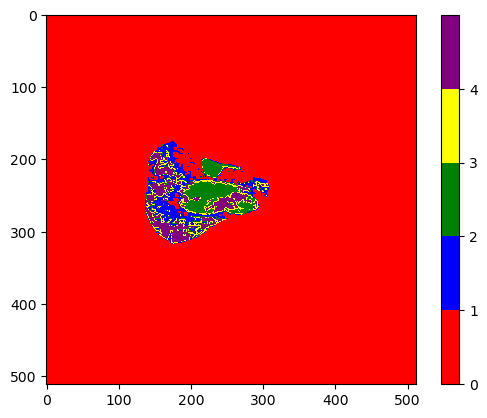

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(y.reshape(-1, 1))

# Get the labels for all pixels
labels = kmeans.labels_.reshape(y.shape)

# Define a color map for each cluster
cluster_colors = ['red', 'blue', 'green', 'yellow', 'purple']

# Create a color map based on cluster labels
cmap = matplotlib.colors.ListedColormap(cluster_colors)
bounds = np.arange(len(cluster_colors) + 1)
norm = matplotlib.colors.BoundaryNorm(bounds, len(cluster_colors))

# Display the segmented image
plt.imshow(labels, cmap=cmap, norm=norm)
plt.colorbar(ticks=bounds[:-1])
plt.show()


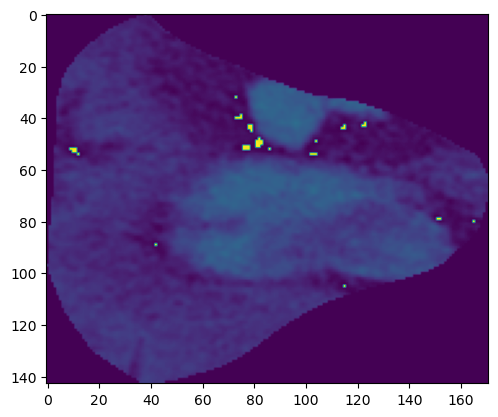

In [34]:
image_array = np.array(y)
non_zero_pixels = np.nonzero(image_array)
min_row, min_col = np.min(non_zero_pixels, axis=1)
max_row, max_col = np.max(non_zero_pixels, axis=1)
cropped_image_pixels = image_array[min_row:max_row, min_col:max_col]
plt.imshow(cropped_image_pixels)
plt.show()
# Create a new Image object from the cropped NumPy array
cropped_image = Image.fromarray(cropped_image_pixels)

In [32]:
cropped_image_pixels = y.crop(y.getbbox())

AttributeError: 'numpy.ndarray' object has no attribute 'crop'

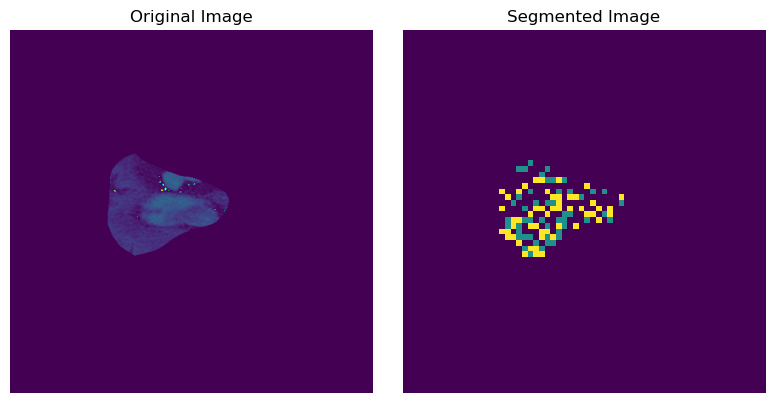

In [31]:
import numpy as np
from PIL import Image
from skimage import color
from skimage.transform import resize
import matplotlib.pyplot as plt
import skimage.io as io

def weight_matrix(image):
    r = 10
    sigmai = 0.1
    sigmax = 4
    l, w = image.shape
    weights = np.zeros((l*w, w*l))
    
    for i in range(l):
        for j in range(w):
            node1 = i*w + j
            for k in range(l):
                for o in range(w):
                    node2 = k*w + o
                    y = -((image[i][j])**2 + (image[k][o])**2)
                    z = np.exp(y / sigmai)
                    h = np.array([i, j])
                    f = np.array([k, o])
                    x = np.linalg.norm(h - f)
                    if x < r:
                        u = -x**2
                        v = np.exp(u / sigmax)
                        weights[node1][node2] = v * z
                    else:
                        weights[node1][node2] = 0

    return weights

def spectral_clustering(image, num_clusters):
    img =image
    f, g = img.shape
    
    # Compute the weight matrix
    weights = weight_matrix(img)
    
    # Compute the diagonal degree matrix
    D = np.zeros((f*g, f*g))
    for b in range(f*g):
        for c in range(f*g):
            D[b][b] += weights[b][c]
    
    # Compute the Laplacian matrix
    L = D - weights
    
    # Compute the eigenvectors corresponding to the smallest eigenvalues
    _, eigenvectors = np.linalg.eigh(L)
    
    # Perform K-means clustering on the eigenvectors
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(eigenvectors[:, 1:num_clusters+1])  # Use the smallest eigenvalues
    
    # Assign labels to the segments
    labels = np.reshape(kmeans.labels_, (f, g))
    
    return labels

# Load example image
img = y

# Resize image for faster processing (optional)
resized_img = resize(np.array(img), (64, 64))

# Perform spectral clustering
num_clusters = 3  # Specify the number of clusters
segmented_image = spectral_clustering(resized_img, num_clusters)

# Visualize the segmented image
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image')
plt.axis('off')
plt.tight_layout()
plt.show()


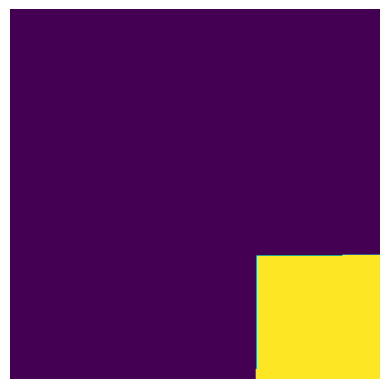

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.future import graph

def image_segmentation(image, n_segments):
    # Perform SLIC superpixel segmentation
    segments = slic(image, n_segments=n_segments)

    # Create a graph-based image representation
    g = graph.rag_mean_color(image, segments)

    # Perform Normalized Cuts segmentation
    labels = graph.cut_normalized(segments, g)

    return labels

# Example usage
# Assuming 'image' is a NumPy array representing the input image
segmented_image = image_segmentation(y, n_segments=10)

# Display the segmented image
plt.imshow(segmented_image)
plt.axis('off')
plt.show()


In [57]:
import numpy as np
import skimage.segmentation as seg
import networkx as nx
from sklearn.cluster import KMeans

def normalized_cuts(image, n_segments):
    # Perform SLIC superpixel segmentation
    segments = seg.slic(image, n_segments=n_segments, compactness=10, sigma=1)

    # Create a graph-based image representation
    g = build_graph(image, segments)

    # Compute the normalized cut
    labels = compute_normalized_cut(g, segments)

    return labels

def build_graph(image, segments):
    # Build a graph representation from superpixels
    g = nx.Graph()

    # Add nodes to the graph
    for segment in np.unique(segments):
        g.add_node(segment)

    # Compute edge weights based on color similarity
    for (u, v, p) in seg.boundary_edges(segments):
        color_u = np.mean(image[segments == u], axis=0)
        color_v = np.mean(image[segments == v], axis=0)
        weight = np.linalg.norm(color_u - color_v)
        g.add_edge(u, v, weight=weight)

    return g

def compute_normalized_cut(graph, segments):
    # Convert the graph to a matrix
    adjacency_matrix = nx.adjacency_matrix(graph)

    # Compute the diagonal degree matrix
    degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1).flatten())

    # Compute the unnormalized Laplacian matrix
    laplacian_matrix = degree_matrix - adjacency_matrix

    # Compute the eigenvectors corresponding to the smallest eigenvalues
    _, eigenvectors = np.linalg.eigh(laplacian_matrix)

    # Perform K-means clustering on the eigenvectors
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(eigenvectors[:, 1:3])  # Use the second and third eigenvectors

    # Assign labels to the segments
    labels = np.zeros_like(segments)
    for segment, label in zip(np.unique(segments), kmeans.labels_):
        labels[segments == segment] = label

    return labels


# Load example image
image =y

# Set the number of segments
n_segments = 100

# Perform normalized cuts segmentation
labels = normalized_cuts(image, n_segments)

# Visualize the segmentation result
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(labels, cmap='viridis')
plt.title('Segmentation Result')
plt.axis('off')
plt.tight_layout()
plt.show()


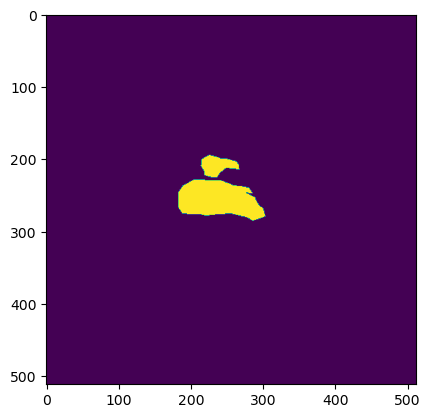

In [34]:
plt.imshow(maskdata[3,1,:,:,16])

In [95]:
import numpy as np
from sklearn.cluster import KMeans

# Load the data
y = clus[112, 0, :, :]

# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(y.reshape(-1, 1))

# Get the labels for all pixels
labels = kmeans.labels_.reshape(y.shape)
print(labels.shape)
# Print the cluster number for each pixel
for i in range(y.shape[0]):
    for j in range(y.shape[1]):
        cluster_number = labels[i, j]
        print(f"Pixel at ({i}, {j}) belongs to cluster {cluster_number}")


(512, 512)


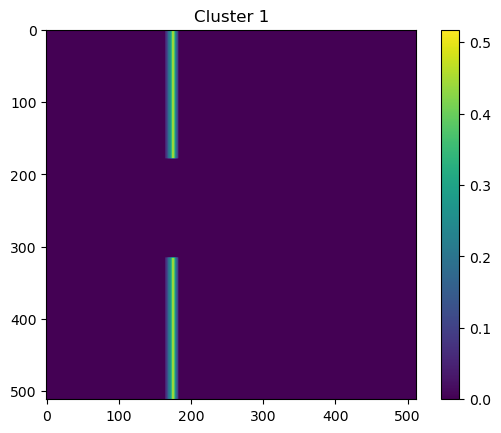

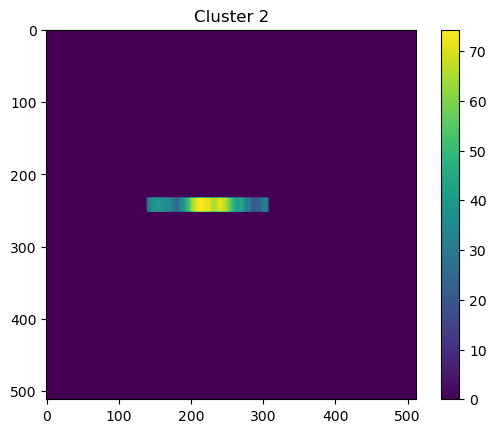

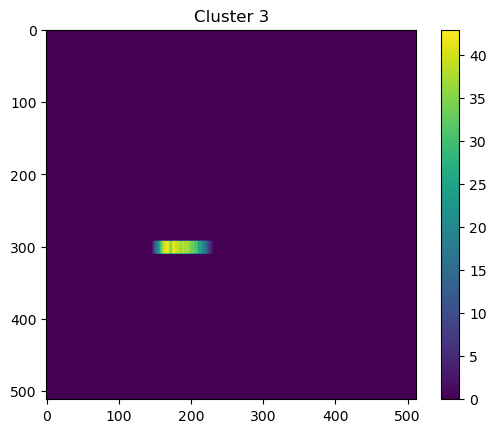

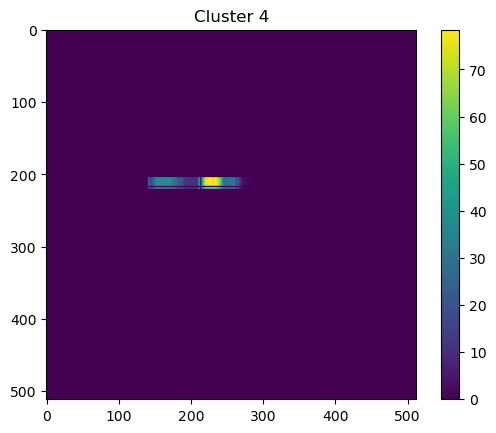

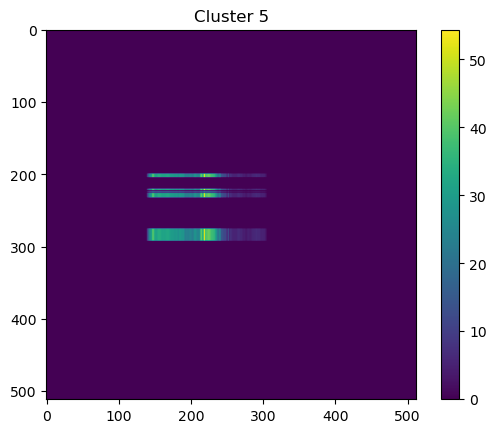

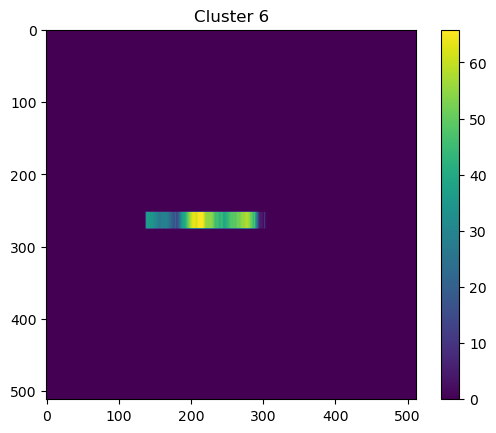

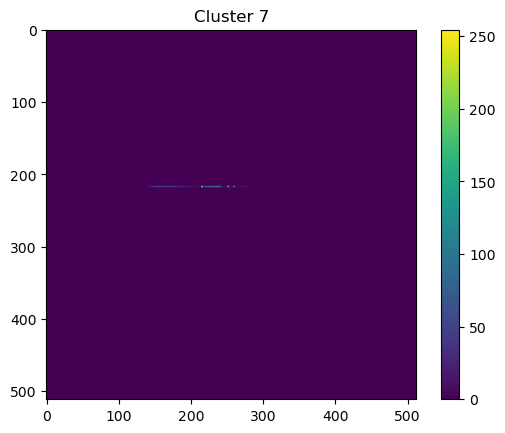

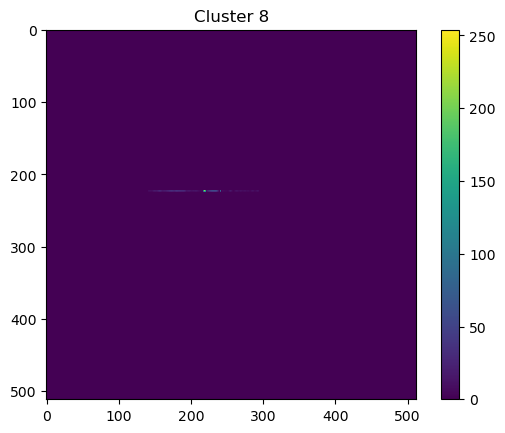

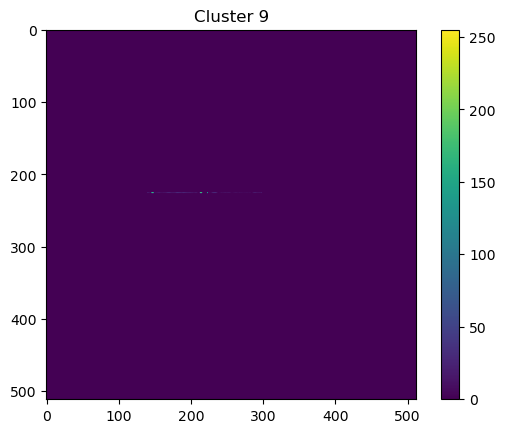

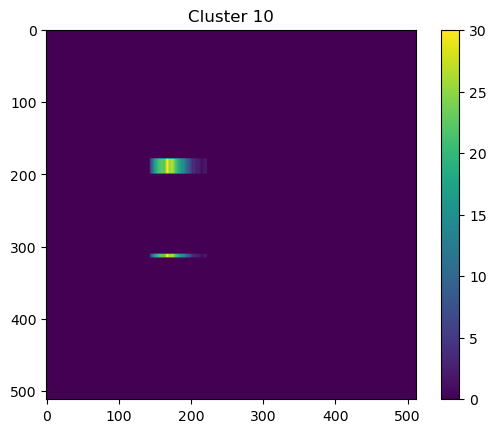

In [87]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
y = clus[112, 0, :, :]

# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(y)

# Get the labels for all pixels
labels = kmeans.labels_

# Get the unique labels
unique_labels = np.unique(labels)

# Get the cluster colors
cluster_colors = kmeans.cluster_centers_

# Plot each cluster separately
for label in unique_labels:
    # Create a binary mask for pixels belonging to the current cluster
    mask = labels == label

    # Apply the mask to the cluster map to extract the pixels of the current cluster
    cluster_image = np.copy(cluster_map)
    cluster_image[~mask] = 0

    # Display the cluster image
    plt.imshow(cluster_image)
    plt.colorbar()
    plt.title(f'Cluster {label+1}')
    plt.show()


In [30]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
new_res.eval()
count=0
countt=0
f=0
teem=0
comb=np.zeros((2240,1,512,512))
psmask=np.zeros((2240,1,128,128))
unetmask=np.zeros((2240,1,512,512))
with torch.no_grad():
    for e, (data, label) in enumerate(train_dataloader):
        #print(label)
       # for i in range(32):
        # plt.imshow(data[i,0,:,:])
        # plt.show()
        #label=np.reshape(label,(32,1))
        #labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        label = Variable(label)
        preds = new_res.forward(data)
        #print(preds.shape)
        n=preds.detach().cpu().numpy()
       # plt.imshow(n)
        #plt.show()
        #f=data.detach().cpu.numpy()
        results.append(preds.detach().cpu().numpy())
        f=data.cpu().numpy()
        t=np.zeros((32,1,16,16))
        for i in range(32):
         #if label[i]==1:
            countt=countt+1
            for j in range(2048):
                # print(camw[j].shape)
             
                 #g=n[i,j,:,:]*camw[j]
                 #print(g.shape)
                 #print(t[i,0,:,:].shape)
                 #print(n[i,j,:,:].shape)
                 t[i,0,:,:]=t[i,0,:,:]+n[i,j,:,:]*camw[j]
                 #plt.imshow(n[i,j,:,:])
                 #plt.show()
     #       plt.imshow(t[i,0,:,:])
      #      plt.show()
 #           plt.imshow(f[i,0,:,:],cmap='gray')
  #          plt.show()
            #import matplotlib.pyplot as plt

# create a figure with two subplots
# plot the first image on the first subplot
            image = t[i,0,:,:]
            min_val = np.min(image)
            max_val = np.max(image)
            normalized_img = (image - min_val) / (max_val - min_val)

       #     plt.imshow(normalized_img,cmap='jet')
      #      plt.colorbar()
            #axs[0].set_title('Image 1')

           # print(image.shape)
            
    
# plot the second image on the second subplot
            #axs[1].imshow(f[i,0,:,:], cmap='gray')
 
            #axs[1].set_title('Image 2')

# display the figure
        #    plt.show()
            threshold_value = 0.7

# Apply thresholding
            thresholded_img = np.array(normalized_img)
            thresholded_img[thresholded_img > threshold_value] = 1
            thresholded_img[thresholded_img <= threshold_value] = 0
            #plt.imshow(thresholded_img)
           # plt.show()
          #  print(thresholded_img.shape)
            oimg=cv2.resize(f[i,0,:,:],(512,512))
            thresholded_img=cv2.resize(thresholded_img,(512,512))
         #   print(thresholded_img.shape)
            u=cv2.resize(t[i,0,:,:],(512,512))
            comb[32*e+i,0,:,:]=thresholded_img*oimg
            
          #  comb[32*e+i,0,:,:]=thresholded_img*oimg
    #        print(comb[32*e+i,0,:,:].max())
     #       print(t[i,0,:,:].max())
            gg=cv2.resize(comb[32*e+i,0,:,:],(512,512))
            gg=gg/255
            threshold_value=0.1
            thresholded_img = np.array(gg)
            fff=np.array(gg)
            thresholded_img[thresholded_img > threshold_value] = 1
            thresholded_img[thresholded_img <= threshold_value] = 0
            threshold_value=0.99
            thresholded_img[thresholded_img > threshold_value] = 1
            thresholded_img[thresholded_img <= threshold_value] = 0
            fff=fff-thresholded_img
            threshold_value=0.05
            fff[fff > threshold_value] = 1
            fff[fff <= threshold_value] = 0
            if(newlab[32*e+i]>=0.5):
                teem=teem+1
                unetmask[32*e+i,0,:,:]=thresholded_img
                eee=cv2.resize(thresholded_img,(128,128))
                psmask[32*e+i,0,:,:]=eee
               # psmask[32*e+i,0,:,:]=1-eee
           # if(newlab[32*e+i]<0.5):
            #    psmask[32*e+i,1,:,:]=0
             #   psmask[32*e+i,0,:,:]=1

          #  if label[i]==1:
           #  plt.imshow(gg)
 #            plt.colorbar()
  #           plt.show()
   #          plt.imshow(fff)
    #         plt.colorbar()
     #        plt.show()
      #       plt.imshow(thresholded_img,cmap='gray')
       #      plt.colorbar()
        #     plt.show()
         #    plt.imshow(f[i,0,:,:])
          #   plt.show()
           #  iii=maskdata[e,1,:,:,i]
#             plt.imshow(iii, cmap='gray')
 #            plt.show()
    

        #loss = criterionn(torch.sigmoid(preds), label)
        #for i in range (32):
         #print(torch.sigmoid(preds[i]))
         #print(label[i])
         #binary_preds = torch.round(torch.sigmoid(preds[i]))
         ##print(binary_preds)
         #if binary_preds==label[i]:
          #count=count+1
        #val_tl += loss
 
        #print(binary_preds)
        #label = label.float()
# Calculate accuracy
        #accuracy = torch.mean(binary_preds == label) 
        #f=f+accuracy
   
    #print("accuracy",f)
    #print(count/2560)
    #valav=(val_tl / 80).detach().cpu().numpy()
    #print('Validation set: Average loss: ',  valav, flush=True)
    #print(count)
    #loss_store.append([av_loss, val_av_loss])   
    #torch.cuda.empty_cache()  
print(countt)
teem

2240


638

In [ ]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
new_res.eval()
count=0
countt=0
f=0
comb=np.zeros((2240,1,512,512))
vpsmask=np.zeros((320,1,128,128))
with torch.no_grad():
    for e, (data, label) in enumerate(val_dataloader):
        #print(label)
       # for i in range(32):
        # plt.imshow(data[i,0,:,:])
        # plt.show()
        #label=np.reshape(label,(32,1))
        #labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        label = Variable(label)
        preds = new_res.forward(data)
        #print(preds.shape)
        n=preds.detach().cpu().numpy()
       # plt.imshow(n)
        #plt.show()
        #f=data.detach().cpu.numpy()
        results.append(preds.detach().cpu().numpy())
        f=data.cpu().numpy()
        t=np.zeros((32,1,16,16))
        for i in range(32):
         #if label[i]==1:
            countt=countt+1
            for j in range(2048):
                # print(camw[j].shape)
             
                 #g=n[i,j,:,:]*camw[j]
                 #print(g.shape)
                 #print(t[i,0,:,:].shape)
                 #print(n[i,j,:,:].shape)
                 t[i,0,:,:]=t[i,0,:,:]+n[i,j,:,:]*camw[j]
                 #plt.imshow(n[i,j,:,:])
                 #plt.show()
            #plt.imshow(t[i,0,:,:])
            #plt.show()
            #plt.imshow(f[i,0,:,:],cmap='gray')
            #plt.show()
            #import matplotlib.pyplot as plt

# create a figure with two subplots
# plot the first image on the first subplot
            image = t[i,0,:,:]
            min_val = np.min(image)
            max_val = np.max(image)
            normalized_img = (image - min_val) / (max_val - min_val)

    #        plt.imshow(normalized_img,cmap='jet')
     #       plt.colorbar()
            #axs[0].set_title('Image 1')

           # print(image.shape)
            
    
# plot the second image on the second subplot
            #axs[1].imshow(f[i,0,:,:], cmap='gray')
 
            #axs[1].set_title('Image 2')

# display the figure
         #   plt.show()
            threshold_value = 0.7

# Apply thresholding
            thresholded_img = np.array(normalized_img)
            thresholded_img[thresholded_img > threshold_value] = 1
            thresholded_img[thresholded_img <= threshold_value] = 0
       #     plt.imshow(thresholded_img)
        #    plt.show()
          #  print(thresholded_img.shape)
            oimg=cv2.resize(f[i,0,:,:],(512,512))
            thresholded_img=cv2.resize(thresholded_img,(512,512))
         #   print(thresholded_img.shape)
            u=cv2.resize(t[i,0,:,:],(512,512))
            comb[32*e+i,0,:,:]=thresholded_img*oimg
            
          #  comb[32*e+i,0,:,:]=thresholded_img*oimg
    #        print(comb[32*e+i,0,:,:].max())
     #       print(t[i,0,:,:].max())
            gg=cv2.resize(comb[32*e+i,0,:,:],(512,512))
            gg=gg/255
            threshold_value=0.1
            thresholded_img = np.array(gg)
            fff=np.array(gg)
            thresholded_img[thresholded_img > threshold_value] = 1
            thresholded_img[thresholded_img <= threshold_value] = 0
            threshold_value=0.99
            thresholded_img[thresholded_img > threshold_value] = 1
            thresholded_img[thresholded_img <= threshold_value] = 0
            fff=fff-thresholded_img
            threshold_value=0.05
            fff[fff > threshold_value] = 1
            fff[fff <= threshold_value] = 0
            if(vnewlab[i]>=0.5):
                eee=cv2.resize(thresholded_img,(128,128))
                vpsmask[32*e+i,0,:,:]=eee

#            if label[i]==1:
 #            plt.imshow(gg)
  #           plt.colorbar()
   #          plt.show()
    #         plt.imshow(fff)
     #        plt.colorbar()
      #       plt.show()
       #      plt.imshow(thresholded_img,cmap='gray')
        #     plt.colorbar()
         #    plt.show()
          #   plt.imshow(f[i,0,:,:])
           #  plt.show()
            # iii=maskdata[e,1,:,:,i]
            # plt.imshow(iii, cmap='gray')
            # plt.show()
    

        #loss = criterionn(torch.sigmoid(preds), label)
        #for i in range (32):
         #print(torch.sigmoid(preds[i]))
         #print(label[i])
         #binary_preds = torch.round(torch.sigmoid(preds[i]))
         ##print(binary_preds)
         #if binary_preds==label[i]:
          #count=count+1
        #val_tl += loss
 
        #print(binary_preds)
        #label = label.float()
# Calculate accuracy
        #accuracy = torch.mean(binary_preds == label) 
        #f=f+accuracy
   
    #print("accuracy",f)
    #print(count/2560)
    #valav=(val_tl / 80).detach().cpu().numpy()
    #print('Validation set: Average loss: ',  valav, flush=True)
    #print(count)
    #loss_store.append([av_loss, val_av_loss])   
    #torch.cuda.empty_cache()  
print(countt)

In [ ]:
ooo=comb[12,0,:,:]
#plt.imshow(ooo)
#plt.show()
ppp=cimgdata[12,:,:,:]
#plt.imshow(ppp)
#plt.show()
print(ppp.shape)

In [ ]:
psmask.min()

In [ ]:
print(psmask[1,0,:,:])

In [ ]:
plt.imshow(psmask[1,1,:,:])

In [ ]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
new_res.eval()
count=0
countt=0
f=0
comb=np.zeros((2240,1,16,16))
with torch.no_grad():
    for e, (data, label) in enumerate(train_dataloader):
        #print(label)
       # for i in range(32):
        # plt.imshow(data[i,0,:,:])
        # plt.show()
        #label=np.reshape(label,(32,1))
        #labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        #label = Variable(label)
        preds = new_res.forward(data)
        #print(preds.shape)
        n=preds.detach().cpu().numpy()
       # plt.imshow(n)
        #plt.show()
        #f=data.detach().cpu.numpy()
        results.append(preds.detach().cpu().numpy())
        f=data.cpu().numpy()
        t=np.zeros((32,1,16,16))
        for i in range(32):
         #if label[i]==1:
            countt=countt+1
            for j in range(2048):
                # print(camw[j].shape)
             
                 #g=n[i,j,:,:]*camw[j]
                 #print(g.shape)
                 #print(t[i,0,:,:].shape)
                 #print(n[i,j,:,:].shape)
                 t[i,0,:,:]=t[i,0,:,:]+n[i,j,:,:]*camw[j]
                 #plt.imshow(n[i,j,:,:])
                 #plt.show()
            #plt.imshow(t[i,0,:,:])
            #plt.show()
            #plt.imshow(f[i,0,:,:],cmap='gray')
            #plt.show()
            #import matplotlib.pyplot as plt

# create a figure with two subplots
# plot the first image on the first subplot
            image = t[i,0,:,:]
            min_val = np.min(image)
            max_val = np.max(image)
            normalized_img = (image - min_val) / (max_val - min_val)

    #        plt.imshow(normalized_img,cmap='jet')
     #       plt.colorbar()
            #axs[0].set_title('Image 1')

           # print(image.shape)
            
    
# plot the second image on the second subplot
            #axs[1].imshow(f[i,0,:,:], cmap='gray')
 
            #axs[1].set_title('Image 2')

# display the figure
         #   plt.show()
            threshold_value = 0.7

# Apply thresholding
            thresholded_img = np.array(normalized_img)
            thresholded_img[thresholded_img > threshold_value] = 1
            thresholded_img[thresholded_img <= threshold_value] = 0
       #     plt.imshow(thresholded_img)
        #    plt.show()
            oimg=cv2.resize(f[i,0,:,:],(16,16))
            comb[32*e+i,0,:,:]=thresholded_img*oimg*t[i,0,:,:]/128
    #        print(comb[32*e+i,0,:,:].max())
     #       print(t[i,0,:,:].max())
            gg=cv2.resize(comb[32*e+i,0,:,:],(512,512))
         #   plt.imshow(comb[32*e+i,0,:,:])
         #   plt.show()

        #loss = criterionn(torch.sigmoid(preds), label)
        #for i in range (32):
         #print(torch.sigmoid(preds[i]))
         #print(label[i])
         #binary_preds = torch.round(torch.sigmoid(preds[i]))
         ##print(binary_preds)
         #if binary_preds==label[i]:
          #count=count+1
        #val_tl += loss
 
        #print(binary_preds)
        #label = label.float()
# Calculate accuracy
        #accuracy = torch.mean(binary_preds == label) 
        #f=f+accuracy
   
    #print("accuracy",f)
    #print(count/2560)
    #valav=(val_tl / 80).detach().cpu().numpy()
    #print('Validation set: Average loss: ',  valav, flush=True)
    #print(count)
    #loss_store.append([av_loss, val_av_loss])   
    #torch.cuda.empty_cache()  
print(countt)

In [ ]:
counttt=0
for i in range(0,70):
 #   print(f"{i+1}th patient masks")
    for j in range(32):
     if np.sum(maskd[i,  1,:,:,j]) > 0:
      counttt=counttt+1
      plt.imshow(maskd[i, 1,:,:, j], cmap='gray')
      plt.show()
     # print(i)
      #print(j)
print(counttt)

In [ ]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
new_res.eval()
count=0
countt=0
f=0
with torch.no_grad():
    for (data, label) in test_dataloader:
        print(label)
       # for i in range(32):
        # plt.imshow(data[i,0,:,:])
        # plt.show()
        #label=np.reshape(label,(32,1))
        #labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        #label = Variable(label)
        preds = new_res.forward(data)
        print(preds.shape)

        n=preds.detach().cpu().numpy()
        for i in range(32):
         for j in range(2048):
          plt.imshow(n[i,j,:,:])
          plt.show()
       # plt.imshow(n)
        #plt.show()
        #f=data.detach().cpu.numpy()
        results.append(preds.detach().cpu().numpy())
        f=data.cpu().numpy()
        t=np.zeros((32,1,16,16))
        for i in range(32):
         if label[i]==1:
            countt=countt+1
            for j in range(2048):

                # print(camw[j].shape)
             
                 #g=n[i,j,:,:]*camw[j]
                 #print(g.shape)
                 #print(t[i,0,:,:].shape)
                 #print(n[i,j,:,:].shape)
                 t[i,0,:,:]=t[i,0,:,:]+n[i,j,:,:]*camw[j]
                 #plt.imshow(n[i,j,:,:])
                 #plt.show()
            #plt.imshow(t[i,0,:,:])
            #plt.show()
            #plt.imshow(f[i,0,:,:],cmap='gray')
            #plt.show()
            #import matplotlib.pyplot as plt

# create a figure with two subplots
            fig, axs = plt.subplots(1, 2)

# plot the first image on the first subplot
            image = cv2.resize(t[i,0,:,:], (512,512))
            axs[0].imshow(image)
            #axs[0].set_title('Image 1')

            print(image.shape)
            
    
# plot the second image on the second subplot
            axs[1].imshow(f[i,0,:,:], cmap='gray')
            #axs[1].set_title('Image 2')

# display the figure
            plt.show()
            

        #loss = criterionn(torch.sigmoid(preds), label)
        #for i in range (32):
         #print(torch.sigmoid(preds[i]))
         #print(label[i])
         #binary_preds = torch.round(torch.sigmoid(preds[i]))
         ##print(binary_preds)
         #if binary_preds==label[i]:
          #count=count+1
        #val_tl += loss
 
        #print(binary_preds)
        #label = label.float()
# Calculate accuracy
        #accuracy = torch.mean(binary_preds == label) 
        #f=f+accuracy
   
    #print("accuracy",f)
    #print(count/2560)
    #valav=(val_tl / 80).detach().cpu().numpy()
    #print('Validation set: Average loss: ',  valav, flush=True)
    #print(count)
    #loss_store.append([av_loss, val_av_loss])   
    #torch.cuda.empty_cache()  
print(countt)

In [ ]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
new_res.eval()
count=0
countt=0
pp=[]
f=0
newdata=np.zeros((2240,2048,16,16))
z=np.zeros((2240,2048,16,16))
h=np.zeros((2240,512,512))
p=np.zeros((512,512))
with torch.no_grad():
    for e, (data, label) in enumerate(train_dataloader):
        #print(n)
       # for i in range(32):
        # plt.imshow(data[i,0,:,:])
        # plt.show()
        #label=np.reshape(label,(32,1))
        #labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        #label = Variable(label)
        preds = new_res.forward(data)
        #print(preds.shape)
        n=preds.detach().cpu().numpy()
       # plt.imshow(n)
        #plt.show()
        #f=data.detach().cpu.numpy()
        results.append(preds.detach().cpu().numpy())
        f=data.cpu().numpy()
        t=np.zeros((32,1,16,16))
        for i in range(32):
           #if label[i]==1:
            countt=countt+1
            #for j in range(2048):
                # print(camw[j].shape)
             
                 #g=n[i,j,:,:]*camw[j]
                 #print(g.shape)
                 #print(t[i,0,:,:].shape)
              #   pp.append(n[i,j,:,:].max())
                 #t[i,0,:,:]=t[i,0,:,:]+n[i,j,:,:]*camw[j]
                 #plt.imshow(n[i,j,:,:])
                 #plt.show()
            for j in range(2048):
               o=32*e+i
               yy=cv2.resize(n[i,j,:,:],(16,16))
               newdata[o,j,:,:]=n[i,j,:,:]
          #     z[o,j,:,:]= np.multiply(yy,comb[32*e+i,0,:,:])
              # z[o,j,:,:]=z[o,j,:,:]/42.96
                
         #   t[i,0,:,:] = np.array(t[i,0,:,:])
         #   t[i,0,:,:][t[i,0,:,:] > 0.9] = 1
         #   t[i,0,:,:][t[i,0,:,:] <= 0.9] = 0

   #         h[o,:,:]=np.multiply(f[i,0,:,:],4*(cv2.resize(t[i,0,:,:], (512,512))))
           # print(t[i,0,:,:].max())
           # plt.imshow(t[i,0,:,:])
           # plt.show()
            #plt.imshow(f[i,0,:,:],cmap='gray')
            #plt.show()
            #import matplotlib.pyplot as plt

# create a figure with two subplots
            #fig, axs = plt.subplots(1, 2)

# plot the first image on the first subplot
            #image = cv2.resize(t[i,0,:,:], (512,512))
            #axs[0].imshow(image)
            #u=t[i,0,:,:]

            #axs[0].set_title('Image 1')

            #print(image.shape)
            #p=f[i,0,:,:]
            
    
# plot the second image on the second subplot
            #axs[1].imshow(f[i,0,:,:], cmap='gray')
 
            #axs[1].set_title('Image 2')

# display the figure
            #plt.show()
            

        #loss = criterionn(torch.sigmoid(preds), label)
        #for i in range (32):
         #print(torch.sigmoid(preds[i]))
         #print(label[i])
         #binary_preds = torch.round(torch.sigmoid(preds[i]))
         ##print(binary_preds)
         #if binary_preds==label[i]:
          #count=count+1
        #val_tl += loss
 
        #print(binary_preds)
        #label = label.float()
# Calculate accuracy
        #accuracy = torch.mean(binary_preds == label) 
        #f=f+accuracy
   
    #print("accuracy",f)
    #print(count/2560)
    #valav=(val_tl / 80).detach().cpu().numpy()
    #print('Validation set: Average loss: ',  valav, flush=True)
    #print(count)
    #loss_store.append([av_loss, val_av_loss])   
    #torch.cuda.empty_cache()  
print(countt)

In [ ]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
new_res.eval()
count=0
countt=0
pp=[]
f=0
vnewdata=np.zeros((320,2048,16,16))
z=np.zeros((2240,2048,16,16))
h=np.zeros((2240,512,512))
p=np.zeros((512,512))
with torch.no_grad():
    for e, (data, label) in enumerate(val_dataloader):
        #print(n)
       # for i in range(32):
        # plt.imshow(data[i,0,:,:])
        # plt.show()
        #label=np.reshape(label,(32,1))
        #labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        #label = Variable(label)
        preds = new_res.forward(data)
        #print(preds.shape)
        n=preds.detach().cpu().numpy()
       # plt.imshow(n)
        #plt.show()
        #f=data.detach().cpu.numpy()
        results.append(preds.detach().cpu().numpy())
        f=data.cpu().numpy()
        t=np.zeros((32,1,16,16))
        for i in range(32):
           #if label[i]==1:
            countt=countt+1
            #for j in range(2048):
                # print(camw[j].shape)
             
                 #g=n[i,j,:,:]*camw[j]
                 #print(g.shape)
                 #print(t[i,0,:,:].shape)
              #   pp.append(n[i,j,:,:].max())
                 #t[i,0,:,:]=t[i,0,:,:]+n[i,j,:,:]*camw[j]
                 #plt.imshow(n[i,j,:,:])
                 #plt.show()
            for j in range(2048):
               o=32*e+i
               yy=cv2.resize(n[i,j,:,:],(16,16))
               vnewdata[o,j,:,:]=n[i,j,:,:]
          #     z[o,j,:,:]= np.multiply(yy,comb[32*e+i,0,:,:])
              # z[o,j,:,:]=z[o,j,:,:]/42.96
                
         #   t[i,0,:,:] = np.array(t[i,0,:,:])
         #   t[i,0,:,:][t[i,0,:,:] > 0.9] = 1
         #   t[i,0,:,:][t[i,0,:,:] <= 0.9] = 0

   #         h[o,:,:]=np.multiply(f[i,0,:,:],4*(cv2.resize(t[i,0,:,:], (512,512))))
           # print(t[i,0,:,:].max())
           # plt.imshow(t[i,0,:,:])
           # plt.show()
            #plt.imshow(f[i,0,:,:],cmap='gray')
            #plt.show()
            #import matplotlib.pyplot as plt

# create a figure with two subplots
            #fig, axs = plt.subplots(1, 2)

# plot the first image on the first subplot
            #image = cv2.resize(t[i,0,:,:], (512,512))
            #axs[0].imshow(image)
            #u=t[i,0,:,:]

            #axs[0].set_title('Image 1')

            #print(image.shape)
            #p=f[i,0,:,:]
            
    
# plot the second image on the second subplot
            #axs[1].imshow(f[i,0,:,:], cmap='gray')
 
            #axs[1].set_title('Image 2')

# display the figure
            #plt.show()
            

        #loss = criterionn(torch.sigmoid(preds), label)
        #for i in range (32):
         #print(torch.sigmoid(preds[i]))
         #print(label[i])
         #binary_preds = torch.round(torch.sigmoid(preds[i]))
         ##print(binary_preds)
         #if binary_preds==label[i]:
          #count=count+1
        #val_tl += loss
 
        #print(binary_preds)
        #label = label.float()
# Calculate accuracy
        #accuracy = torch.mean(binary_preds == label) 
        #f=f+accuracy
   
    #print("accuracy",f)
    #print(count/2560)
    #valav=(val_tl / 80).detach().cpu().numpy()
    #print('Validation set: Average loss: ',  valav, flush=True)
    #print(count)
    #loss_store.append([av_loss, val_av_loss])   
    #torch.cuda.empty_cache()  
print(countt)

In [ ]:
print(newdata.shape)

In [ ]:
print(comb.shape)
z=torch.from_numpy(comb)
type(z)

In [ ]:
adaptive_avgpool = nn.AdaptiveAvgPool2d(output_size=(1, 1))

# apply adaptive average pooling to input tensor x
output = adaptive_avgpool(z)

# output tensor has shape (batch_size, channels, 1, 1)
print(output.shape)


In [ ]:
output=output.numpy()

In [ ]:
for j in range(2048):
        plt.imshow(z[0,j,:,:])
        plt.show()

In [ ]:


#kk = nn.Linear(in_features=2048, out_features=1, bias=True)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(2048, 1)
        
    def forward(self, x):
        x = self.fc(x)
       # x=F.relu()
        return x
      #  return x
kk=Net()

In [ ]:
kk

In [ ]:
ztrain = output[0:2240]
Xval = cimgdata[2240:2560]
Xtest=cimgdata[2560:]
ytrain=cclassification[0:2240]
yval=cclassification[2240:2560]
ytest=cclassification[2560:]

In [ ]:
ytrain

In [ ]:
ztrain.shape

In [ ]:
#print(Xtrain.shape, ytrain.shape)
#print(Xval.shape, yval.shape)

from torch.utils.data import DataLoader

# In[151]:


train_datasett = numpy_dataset(ztrain, ytrain)
#val_dataset = numpy_dataset(Xval, yval)
print(len(train_dataset))


# In[152]:


#test_dataset = numpy_dataset(Xtest, ytest)
#test_dataloader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=True)


# In[153]:


#train_dataset = numpy_dataset(stacked_data, y)
trainn_dataloader = DataLoader(train_datasett, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=True)
#val_dataloader = DataLoader(val_dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=True)
print(len(train_dataloader))

In [ ]:
if cuda:
    kk.cuda()
kk = torch.nn.DataParallel(kk)

In [ ]:
kk.train()

In [ ]:
#modell = nn.Sequential(
 #           nn.Linear(150528, 512),
  #          nn.Tanh(),
    #        nn.Linear(512, 6),
     #       nn.LogSoftmax(dim=1))
learning_rate = 0.001
optimizerr = optim.SGD(kk.parameters(), lr=learning_rate)
criterionn = nn.BCELoss()
#n_epochs = 40
#for epoch in range(n_epochs):
 #   for imgs, labels in train_loader:
  #      outputs = model(imgs.view(imgs.shape[0], -1))
   #     loss = loss_fn(outputs, labels)
    #    optimizer.zero_grad()
     #   loss.backward()
      #  optimizer.step()

#    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
from torch.autograd import Variable
#MODEL_PATH = 'models/'

# Initialise early stopping
#early_stopping = EarlyStoppingModelCheckpointing(args.patience, verbose=False)
args.epochs = 200
loss_store = []
for epoch in range(1, args.epochs+1):
    print('Epoch ', epoch, '/', args.epochs, flush=True)
    # First train 
    total_loss=0
    val_total_loss=0
    kk.train()     
    batches = 0
    for batch_idx, (dataa, labell) in enumerate(trainn_dataloader):
        print(dataa.shape)
        dataa=dataa.reshape(32,2048)
        labell=np.reshape(labell,(32,1))
        if cuda:
            dataa = dataa.cuda()
            labell = labell.cuda()
        dataa = Variable(dataa)
        labell = Variable(labell)            
        batches += 1
        # Forward
        optimizerr.zero_grad()
        seg_pred = kk.forward(dataa)
        # Calc loss
       # y=np.reshape(seg_pred,(4))
       # print(label.shape)
        train_loss = criterionn(torch.sigmoid(seg_pred), labell)
        train_loss.backward()
        optimizerr.step()
        total_loss += train_loss
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(dataa), len(train_dataloader.dataset),
                       100. * (batch_idx+1) / len(train_dataloader), train_loss.item()), flush=True)
    av_loss = (total_loss / batches).detach().cpu().numpy()   
    print('Training set: Average loss:',  av_loss,flush=True) 
    #kk.eval()
    #batches = 0 
    #with torch.no_grad():
     #   for batch_idx, (data, label) in enumerate(val_dataloader):
      #      label=np.reshape(label,(32,1))
       #     if cuda:
        #        data = data.cuda()
         #       label = label.cuda()
     #       data = Variable(data)
      #      label = Variable(label)
       #     batches += 1
        #    pred_seg = resnet.forward(data)
           # print(label)
            #print(torch.sigmoid(pred_seg))
         #   loss = criterionn(torch.sigmoid(pred_seg), label)
          #  val_total_loss += loss
   # val_av_loss=(val_total_loss / batches).detach().cpu().numpy()
   # print('Validation set: Average loss: ',  val_av_loss, flush=True)
   # loss_store.append([av_loss, val_av_loss])
    if epoch==20:
        torch.save(resnet.state_dict(), 'lresnett20weights')
    if epoch==30:
        torch.save(resnet.state_dict(), 'lresnett30weights')
    if epoch==35:
        torch.save(resnet.state_dict(), 'lresnett35weights')
    if epoch==40:
        torch.save(resnet.state_dict(), 'lresnett40weights')
    if epoch==45:
        torch.save(resnet.state_dict(), 'lresnett45weights')
    if epoch==50:
        torch.save(resnet.state_dict(), 'lresnett50weights')
    if epoch==55:
        torch.save(resnet.state_dict(), 'lresnett55weights')
    if epoch==60:
        torch.save(resnet.state_dict(), 'lresnett60weights')
    if epoch==65:
        torch.save(resnet.state_dict(), 'lresnett65weights')
    if epoch==70:
        torch.save(resnet.state_dict(), 'lresnett70weights')
    if epoch==75:
        torch.save(resnet.state_dict(), 'lresnett75weights')
    if epoch==80:
        torch.save(resnet.state_dict(), 'lresnett80weights')
    if epoch==85:
        torch.save(resnet.state_dict(), 'lresnett85weights')
    if epoch==90:
        torch.save(resnet.state_dict(), 'lresnett90weights')
    if epoch==95:
        torch.save(resnet.state_dict(), 'lresnett95weights')
 #   early_stopping(val_av_loss, val_dice_accuracy, best_val_dice_accuracy, class_model, epoch, optimizer, av_loss, MODEL_PATH)
        
  #  if val_dice_accuracy > best_val_dice_accuracy:
   #     best_val_dice_accuracy = val_dice_accuracy
        
    #if early_stopping.early_stop: # Okay, when the patience is reached and early_stop flag is True, we stop training.
     #   loss_store = np.array(loss_store)
#         np.save(LOSS_PATH, loss_store)
      #  break
        # If you want the system to terminate at this point, you can use sys.exit; very handy when running 
        # codes in clusters
       # sys.exit('Patience Reached - Early Stopping Activated')
    torch.cuda.empty_cache()  
torch.save(resnet.state_dict(), 'lres1111weights')

In [ ]:
kk=kk.module
camww=kk.fc.weight

In [ ]:
camww=kk.fc.weight

In [ ]:

camww=camww.reshape(2048)
camww.shape

In [ ]:
z.type()

In [ ]:
h=np.zeros((2240,1,16,16))
for i in range(2240):
 for j in range(2048):
 #   h[i,j,:,:]=z[i,j,:,:]*camww[j]
  #  camww = camww.tolist()
    d=camww[j]
    #print(d.type())
    h[i,0,:,:]=h[i,0,:,:]+z[i,j,:,:]*d

In [ ]:
camww=camww.detach().cpu().numpy()

In [ ]:
q=z.detach().cpu().numpy()

In [ ]:
q.shape
q=q.numpy()
q.shape

In [ ]:
for i in range(2240):
 for j in range(2048):
    plt.imshow(z[i,j,:,:])
    plt.show()

In [ ]:
h=np.zeros((2240,1,16,16))

In [ ]:
camww.type()

In [ ]:
for i in range(2240):
 for j in range(2048):
 #   h[i,j,:,:]=z[i,j,:,:]*camww[j]
  #  camww = camww.tolist()
    d=camww[j]
    #print(d.type())
    h[i,0,:,:]=h[i,0,:,:]+q[i,j,:,:]*d
  #  h[i,0,:,:] += np.expand_dims(z[:, j, :, :] * camww[j], axis=1)
    
    

In [ ]:
for i in range(2240):
 #if label[i]==1:
    m=cv2.resize(h[i,0,:,:],(16,16))
    plt.imshow(m)
    plt.show()

In [ ]:
from torch.autograd import Variable
results = []
labs=[]
val_tl=0
valav=0
resnet.eval()
count=0

with torch.no_grad():
    for (data, label) in train_dataloader:
        label=np.reshape(label,(32,1))
        labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        label = Variable(label)
        print(label)
        preds = resnet.forward(data)
        print(torch.sigmoid(preds))
        for i in range (32):
         u=torch.round(torch.sigmoid(preds[i]))
         if u==label[i]:
            count=count+1
        results.append(preds.detach().cpu().numpy())
        loss = criterionn(torch.sigmoid(preds), label)
        val_tl += loss
    valav=(val_tl / 20).detach().cpu().numpy()
    print('Validation set: Average loss: ',  valav, flush=True)
    print(count)
    #loss_store.append([av_loss, val_av_loss])   
    torch.cuda.empty_cache()  
    print(count)



In [ ]:
!pip install cython
!pip install git+https://github.com/lucasb-eyer/pydensecrf.git


In [ ]:
import numpy as np
#!pip install pydensecrf
import pydensecrf.densecrf as dcrf
import matplotlib.pyplot as plt

In [ ]:
from pydensecrf.utils import unary_from_labels, create_pairwise_bilateral, create_pairwise_gaussian

In [ ]:
conda install -c conda-forge gdal

In [ ]:
from skimage.color import gray2rgb
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

#from osgeo import gdal
%matplotlib inline

In [ ]:
def crf(original_image, annotated_image,output_image, use_2d = True):
    
    # Converting annotated image to RGB if it is Gray scale
    if(len(annotated_image.shape)<3):
        annotated_image = gray2rgb(annotated_image).astype(np.uint32)
    
  #  cv2.imwrite("testing2.png",annotated_image)
    annotated_image = annotated_image.astype(np.uint32)
    #Converting the annotations RGB color to single 32 bit integer
    annotated_label = annotated_image[:,:,0].astype(np.uint32) + (annotated_image[:,:,1]<<8).astype(np.uint32) + (annotated_image[:,:,2]<<16).astype(np.uint32)
    
    # Convert the 32bit integer color to 0,1, 2, ... labels.
    colors, labels = np.unique(annotated_label, return_inverse=True)
    
    #Creating a mapping back to 32 bit colors
    colorize = np.empty((len(colors), 3), np.uint8)
    colorize[:,0] = (colors & 0x0000FF)
    colorize[:,1] = (colors & 0x00FF00) >> 8
    colorize[:,2] = (colors & 0xFF0000) >> 16
    
    #Gives no of class labels in the annotated image
    n_labels = len(set(labels.flat)) 
    
    print("No of labels in the Image are ")
    print(n_labels)
    
    
    #Setting up the CRF model
    if use_2d :
        d = dcrf.DenseCRF2D(original_image.shape[1], original_image.shape[0], n_labels)

        # get unary potentials (neg log probability)
        U = unary_from_labels(labels, n_labels, gt_prob=0.90, zero_unsure=False)
        print(U.shape)
       # U = U.reshape()

        d.setUnaryEnergy(U)
        d.addPairwiseGaussian(sxy=(3, 3), compat=3, kernel=dcrf.DIAG_KERNEL,
                          normalization=dcrf.NORMALIZE_SYMMETRIC)

        # This adds the color-dependent term, i.e. features are (x,y,r,g,b).
        d.addPairwiseBilateral(sxy=(80, 80), srgb=(13, 13, 13), rgbim=original_image,
                           compat=10,
                           kernel=dcrf.DIAG_KERNEL,
                           normalization=dcrf.NORMALIZE_SYMMETRIC)
        
    #Run Inference for 5 steps 
    Q = d.inference(5)

    # Find out the most probable class for each pixel.
    MAP = np.argmax(Q, axis=0)

    # Convert the MAP (labels) back to the corresponding colors and save the image.
    # Note that there is no "unknown" here anymore, no matter what we had at first.
    MAP = colorize[MAP,:]
    cv2.imwrite(output_image,MAP.reshape(original_image.shape))
    return MAP.reshape(original_image.shape)        

In [ ]:
cv2.imwrite("testing2.png", ooo.astype(np.uint8))


In [ ]:
ppp = np.ascontiguousarray(ppp)
print(ppp.shape)
crfimage = crf(ppp,ooo,"out.png")

In [ ]:
newdata.shape
psmask.shape
newdata.max()

In [ ]:
unetdata.min()

In [ ]:
plt.imshow(psmask[12,0,:,:],cmap='gray')
plt.show()

In [ ]:
newdata=newdata/newdata.max()

In [ ]:
newdata.max()

In [ ]:
newdata.shape

In [ ]:
cimgdata.shape

In [ ]:
Xtrain = newdata[0:2240]
#Xval = vnewdata[0:320]
#Xtest=cimgdata[2560:]
ytrain=psmask[0:2240]
#ddt=cimgdata[0:2240]
#yval=vpsmask[0:320]
#ytest=cclassification[2560:]

In [ ]:
class newnumpy_dataset(Dataset):
    def __init__(self, data, target, extra_data, transform=None):
        self.data = torch.from_numpy(data).float()
        self.target = torch.from_numpy(target).float()
        self.extra_data = torch.from_numpy(extra_data).float()
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        ed = self.extra_data[index]

        if self.transform:
            x = self.transform(x)

        return x, y, ed

    def __len__(self):
        return len(self.data)


In [ ]:

from torch.utils.data import DataLoader

# In[151]:


train_dataset = numpy_dataset(Xtrain, ytrain)
#val_dataset = numpy_dataset(Xval, yval)
print(len(train_dataset))


# In[152]:


#test_dataset = numpy_dataset(Xtest, ytest)
#test_dataloader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=True)


# In[153]:


#train_dataset = numpy_dataset(stacked_data, y)
train_dataloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=True)
#val_dataloader = DataLoader(val_dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=True)
print(len(train_dataloader))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ARM(nn.Module):
    def __init__(self, in_channels=2048, out_channels=16, dilation=2):
        super(ARM, self).__init__()
    #    self.tconv1=nn.ConvTranspose2d(in_channels, out_channels=512, kernel_size=3, stride=2, padding=1, output_padding=1)
    #    self.tconv2=nn.ConvTranspose2d(512, 128, kernel_size=3, stride=2, padding=1, output_padding=1)
    #    self.tconv3=nn.ConvTranspose2d(128, out_channels, kernel_size=3, stride=2, padding=1, output_padding=1)
        #self.convv=nn.Conv2d(2048,64,kernel_size=3,stride=1,padding=1)
       # self.conv1 = nn.Conv2d(in_channels, 512, kernel_size=3, stride=1,padding=1)
       # self.conv2 = nn.Conv2d(512, 128, kernel_size=3, padding=1)
       # self.conv3 = nn.Conv2d(128, out_channels, kernel_size=3, padding=dilation, dilation=dilation)
   #     self.oconv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
    #    self.oconv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
     #   self.oconv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
      #  self.oconv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
       # self.oconv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.oconv1 = nn.Conv2d(3, 8, kernel_size=4, stride=2, padding=1) # output size: 8 x 256 x 256
        self.oconv2 = nn.Conv2d(8, 32, kernel_size=4, stride=2, padding=1) # output size: 32 x 128 x 128
        self.oconv3 = nn.Conv2d(32, 256, kernel_size=4, stride=2, padding=1) # output size: 256 x 64 x 64
        self.oconv4 = nn.Conv2d(256, 1024, kernel_size=4, stride=2, padding=1) # output size: 1024 x 32 x 32
        self.oconv5 = nn.Conv2d(1024, 2048, kernel_size=4, stride=2, padding=1) # output size: 2048 x 16 x 16
        #self.orelu = nn.ReLU(inplace=True)


        self.conv0 = nn.Conv2d(4096,4096, 5, padding=2, groups=32)
        self.conv_spatial = nn.Conv2d(
            4096, 4096, 7, stride=1, padding=9, groups=4096, dilation=3)
        self.conv1 = nn.Conv2d(4096, 4096, 1)
        self.conv11=nn.Conv2d(4096,1,1)
  #      self.relu = nn.ReLU(inplace=True)
        self.tconv1=nn.ConvTranspose2d(4096, out_channels=4096, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.tconv2=nn.ConvTranspose2d(4096, 4096, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.tconv3=nn.ConvTranspose2d(4096, 4096, kernel_size=3, stride=2, padding=1, output_padding=1)
      #  self.depthwise_conv = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, groups=out_channels)
      #  self.pointwise_conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
      #  self.relu = nn.ReLU(inplace=True)

    def forward(self, x,y):
        #nn = x.cpu().detach().numpy()
        #print(nn.shape)
        #plt.imshow(nn[0,0,:,:])
        #plt.show()
        # feature map processing
       # out = self.tconv1(x)
       # nn = out.cpu().detach().numpy()
       # print(nn.shape)
       # plt.imshow(nn[0,0,:,:])
       # plt.show()
    #    out = self.relu(out)
        #out = self.tconv2(out)
        #nn = out.cpu().detach().numpy()
        #print(nn.shape)
        #plt.imshow(nn[0,0,:,:])
        #plt.show()
#        out = self.relu(out)
        #out = self.tconv3(out)
 #       out = self.relu(out)
        #u = x.clone()
        #nn = out.cpu().detach().numpy()
        #print(nn.shape)
        #plt.imshow(nn[0,0,:,:])
        #plt.show()
 #       print(x.shape)
      #  m = nn.GELU()
      #  input = torch.randn(2)
       # output = m(x)
        y = self.oconv1(y)
        y = torch.sigmoid(y)
        y = self.oconv2(y)
        y = torch.sigmoid(y)
        y = self.oconv3(y)
        y = torch.sigmoid(y)
        y = self.oconv4(y)
        y = torch.sigmoid(y)
        y = self.oconv5(y)
        y = torch.sigmoid(y)
        print(y.shape)
        x = torch.cat((x, y), dim=1)
        print(x.shape)
        
        attn = self.conv0(x)
   #     attn = self.relu(attn)
        attn = self.conv_spatial(attn)
    #    attn = self.relu(attn)
        attn = self.conv1(attn)
     #   attn = self.relu(attn)
        out=x*attn
        attn = self.conv0(out)
      #  attn = self.relu(attn)
        attn = self.conv_spatial(attn)
 #       attn = self.relu(attn)
        attn = self.conv1(attn)
 #       attn = self.relu(attn)
        out=x*attn
        attn = self.conv0(out)
  #      attn = self.relu(attn)
        attn = self.conv_spatial(attn)
   #     attn = self.relu(attn)
        attn = self.conv1(attn)
    #    attn = self.relu(attn)
        out=x*attn
        

   #     print(out.shape)
       # out=cv2.resize(out,(32,2048,128,128))
        #nn = out.cpu().detach().numpy()
        #print(nn.shape)
        #plt.imshow(nn[0,0,:,:])
        #plt.show()
        #out=self.tconv1(out)
        #out = self.tconv2(out)
        #out = self.tconv3(out)
        #print(out.shape)
        out=self.conv11(out)
        new_height, new_width = 128, 128
        out = F.interpolate(out, size=(new_height, new_width), mode='bilinear', align_corners=False)
        #print(out.shape)

        
        
        # attention map
      #  attention = self.depthwise_conv(out)
      #  attention = self.relu(attention)
      #  attention = self.pointwise_conv(attention)
      #  attention = torch.sigmoid(attention)
        # attended feature map
     #   out = out * attention
        # skip connection
     #   out = out + x
        print(out.shape)
        return out

#class AttentionModule(nn.Module):
 #   def __init__(self, dim):
  #      super().__init__()
   #     self.conv0 = nn.Conv2d(dim, dim, 5, padding=2, groups=16)
    #    self.conv_spatial = nn.Conv2d(
     #       dim, dim, 7, stride=1, padding=9, groups=dim, dilation=3)
      #  self.conv1 = nn.Conv2d(dim, dim, 1)

    #def forward(self, x):
     #   u = x.clone()
      #  attn = self.conv0(x)
       # attn = self.conv_spatial(attn)
        #attn = self.conv1(attn)
        #return u * attn


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ARM(nn.Module):
    def __init__(self, in_channels=2048, out_channels=16, dilation=2):
        super(ARM, self).__init__()

        self.oconv1 = nn.Conv2d(3, 8, kernel_size=4, stride=2, padding=1) # output size: 8 x 256 x 256
        self.oconv2 = nn.Conv2d(8, 32, kernel_size=4, stride=2, padding=1) # output size: 32 x 128 x 128
        self.oconv3 = nn.Conv2d(32, 256, kernel_size=4, stride=2, padding=1) # output size: 256 x 64 x 64
        self.oconv4 = nn.Conv2d(256, 1024, kernel_size=4, stride=2, padding=1) # output size: 1024 x 32 x 32
        self.oconv5 = nn.Conv2d(1024, 2048, kernel_size=4, stride=2, padding=1) # output size: 2048 x 16 x 16
        #self.orelu = nn.ReLU(inplace=True)


        self.conv0 = nn.Conv2d(2048,2048, 5, padding=2, groups=32)
        self.conv_spatial = nn.Conv2d(
            2048, 2048, 7, stride=1, padding=9, groups=2048, dilation=3)
        self.conv1 = nn.Conv2d(2048, 2048, 1)
        self.conv11=nn.Conv2d(2048,1,1)
  #      self.relu = nn.ReLU(inplace=True)
      #  self.tconv1=nn.ConvTranspose2d(4096, out_channels=4096, kernel_size=3, stride=2, padding=1, output_padding=1)
      #  self.tconv2=nn.ConvTranspose2d(4096, 4096, kernel_size=3, stride=2, padding=1, output_padding=1)
      #  self.tconv3=nn.ConvTranspose2d(4096, 4096, kernel_size=3, stride=2, padding=1, output_padding=1)


    def forward(self, x):

    #    y = self.oconv1(y)
  #      y = self.relu(y)
     #   y = self.oconv2(y)
   #     y = self.relu(y)
      #  y = self.oconv3(y)
    #    y = self.relu(y)
       # y = self.oconv4(y)
     #   y = self.relu(y)
      #  y = self.oconv5(y)
   #     y = self.relu(y)
      #  print(y.shape)
      #  x = torch.cat((x, y), dim=1)
       # print(x.shape)
        
        attn = self.conv0(x)
   #     attn = self.relu(attn)
        attn = self.conv_spatial(attn)
    #    attn = self.relu(attn)
        attn = self.conv1(attn)
     #   attn = self.relu(attn)
        out=x*attn
        attn = self.conv0(out)
      #  attn = self.relu(attn)
        attn = self.conv_spatial(attn)
 #       attn = self.relu(attn)
        attn = self.conv1(attn)
 #       attn = self.relu(attn)
        out=x*attn
        attn = self.conv0(out)
  #      attn = self.relu(attn)
        attn = self.conv_spatial(attn)
   #     attn = self.relu(attn)
        attn = self.conv1(attn)
    #    attn = self.relu(attn)
        out=x*attn

        out=self.conv11(out)
        new_height, new_width = 128, 128
        out = F.interpolate(out, size=(new_height, new_width), mode='bilinear', align_corners=False)



        print(out.shape)
        return out




In [ ]:
modeel = ARM()
if cuda:
    modeel.cuda()

In [ ]:
class dice_loss(nn.Module):
    def __init__(self):
        super(dice_loss, self).__init__()
        self.eps=1e-7

    def forward(self, x, target):
        num_classes = target.shape[1]   # Channels first
        target = target.type(x.type())
        dims = (0,) + tuple(range(2, target.ndimension()))
        intersection = torch.sum(x * target, dims)
        cardinality = torch.sum(x + target, dims)
        dice_loss = (2. * intersection / (cardinality + self.eps)).mean()
        return (1 - dice_loss)


In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, gamma=0, alpha=0.5, size_average=True):
        super(FocalLoss, self).__init__()
        self.gamma = torch.Tensor([gamma])
        self.alpha = alpha
        if isinstance(alpha, (float, int)):
            self.alpha = torch.Tensor([alpha, 1-alpha])
        if isinstance(alpha, list):
            self.alpha = torch.Tensor(alpha)
        self.size_average = size_average

    def forward(self, input, target):
        print(input.size())
        print(target.size())
        if input.dim() > 2:
            input = input.view(input.size(0), input.size(1), -1)  # N,C,H,W => N,C,H*W
            input = input.transpose(1, 2)    # N,C,H*W => N,H*W,C
            input = input.contiguous().view(-1, input.size(2))   # N,H*W,C => N*H*W,C
        target = target.view(-1, 1)

        if input.is_cuda:
            self.alpha = self.alpha.cuda()
            self.gamma = self.gamma.cuda()
        logpt = F.log_softmax(input, dim=1)
       # logpt = F.log_softmax(input)
        print(logpt.shape)
        logpt = logpt.gather(0, target.long())
        logpt = logpt.view(-1)
        pt = Variable(logpt.data.exp())
   #     print(self.gamma)
        if self.alpha is not None:
            if self.alpha.type() != input.data.type():
                self.alpha = self.alpha.type_as(input.data)
            at = self.alpha.gather(0, target.data.view(-1).long())
            logpt = logpt * Variable(at)
        
       # print('####################### LOSS DEBUGGING #########################')
    #    print(pt.size())
     #   print(logpt.size())
      #  print(self.gamma.size())
       # print(self.gamma)
#        print(self.alpha.size())
 #       print(self.alpha)

        loss = -1 * (1-pt)**self.gamma * logpt
        if self.size_average:
            return loss.mean()
        else:
            return loss.sum()


In [ ]:
#import tensorflow as tf

In [ ]:
import torch.optim as optim
#criterion = FocalLoss()
import torch.nn as nn

criterion = dice_loss()
#criterion=loss()
#class_weights=[0.3,0.7]
#criterion = FocalLoss() 



if cuda:
    criterion.cuda()
optimizer = optim.Adam(list(modeel.parameters()), lr=0.01)

In [ ]:
plt.imshow(newdata[0,0,:,:])

In [ ]:
from torch.autograd import Variable

args.epochs = 20
loss_store = []
max_grad_norm = 1.0  # set the maximum gradient norm

for epoch in range(1, args.epochs+1):
    print('Epoch ', epoch, '/', args.epochs, flush=True)
    total_loss = 0
    val_total_loss = 0
    modeel.train() 
    batches = 0
    for batch_idx, (data, label) in enumerate(train_dataloader):
        if cuda:
            data = data.cuda()
            label = label.cuda()
           # ed = ed.cuda()
        data = Variable(data)
        label = Variable(label) 
        #ed = Variable(ed)
        batches += 1
        optimizer.zero_grad()
        seg_pred = modeel.forward(data)
        train_loss = criterion(seg_pred, label)
        train_loss.backward()
      #  torch.nn.utils.clip_grad_norm_(modeel.parameters(), max_grad_norm)  # clip gradients
        optimizer.step()
        total_loss += train_loss
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(data), len(train_dataloader.dataset),
                       100. * (batch_idx+1) / len(train_dataloader), train_loss.item()), flush=True)
    av_loss = (total_loss / batches).detach().cpu().numpy()   
    print('Training set: Average loss: ',  av_loss, flush=True) 


In [ ]:
from torch.autograd import Variable
args.epochs = 20
loss_store = []
for epoch in range(1, args.epochs+1):
    print('Epoch ', epoch, '/', args.epochs, flush=True)
    total_loss = 0
    val_total_loss = 0
    modeel.train() 
    batches = 0
    for batch_idx, (data, label) in enumerate(train_dataloader):
    #    print(ed)
        if cuda:
            data = data.cuda()
            label = label.cuda()
            #ed=ed.cuda()
        #print("1")
        data = Variable(data)
    #    print(data.shape)
        label = Variable(label) 
   #     ed=Variable(ed)
        batches += 1
        optimizer.zero_grad()
        seg_pred = modeel.forward(data)
        print(seg_pred)
     #   print(seg_pred.max())
        x = seg_pred.detach().cpu().numpy()
 
      #  ui=x.numpy()
  #      plt.imshow(x[0,0,:,:])
   #     plt.show()
        #print(label.shape)
    #    label = log_probs.gather(1, label.unsqueeze(1).to(torch.int64))

        train_loss = criterion(seg_pred, label)
        #train_loss=iou(seg_pred,label)
        train_loss.backward()
        optimizer.step()
        total_loss += train_loss
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(data), len(train_dataloader.dataset),
                       100. * (batch_idx+1) / len(train_dataloader), train_loss.item()), flush=True)
    av_loss = (total_loss / batches).detach().cpu().numpy()   
    print('Training set: Average loss: ',  av_loss, flush=True) 
   # modeel.eval()
    #batches = 0 
 #   with torch.no_grad():
  #      for batch_idx, (data, label) in enumerate(val_dataloader):
   #         if cuda:
     #           data = data.cuda()
      #          label = label.cuda()
       #     data = Variable(data)
        #    label = Variable(label)
         #   batches += 1
          #  pred_seg = modeel.forward(data)
           # loss = criterion(pred_seg, label)
           # val_total_loss += loss
  #  val_av_loss = (val_total_loss / batches).detach().cpu().numpy()
  #  print('Validation set: Average loss: ',  val_av_loss, flush=True)
  #  loss_store.append([av_loss, val_av_loss])    

In [ ]:
results = []
labs=[]
modeel.eval()
with torch.no_grad():
   # for (data, label) in train_dataloader:
    for e, (data, label,ed) in enumerate(train_dataloader):
        labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
            ed=ed.cuda()
        data = Variable(data)
        label = Variable(label)
        ed = Variable(ed)
        preds = modeel.forward(data,ed)

       #     plt.imshow(thresholded_img)
        #    plt.show()
  #      print(label.shape)
        nn = preds.cpu().detach().numpy()
        jj = label.cpu().detach().numpy()
        dd = data.cpu().detach().numpy()


  #      nn=cv2.resize(nn,(512,512))
   #     jj=cv2.resize(jj,(512,512))
     #   print(nn.shape)
        for i in range(32):
         #if newlab[i]==1:
          threshold_value = 0.7
# Apply thresholding
          thresholded_img = np.array(nn[i,0,:,:])
          thresholded_img[thresholded_img > threshold_value] = 1
          thresholded_img[thresholded_img <= threshold_value] = 0
         # plt.imshow(thresholded_img)
         # plt.show()
          kk=cv2.resize(maskdata[e,1,:,:,i],(128,128))
        #  plt.imshow(kk)
        #  plt.show()
        #  plt.imshow(jj[i,0,:,:])
        #  plt.show()
          plt.imshow(nn[i,0,:,:])
          plt.show()
          print(32*e+i)
          plt.imshow(cimgdata[32*e+i,0,:,:])
          plt.show()
        results.append(preds.detach().cpu().numpy())

In [ ]:
results = []
labs=[]
modeel.eval()
with torch.no_grad():
   # for (data, label) in train_dataloader:
    for e, (data, label) in enumerate(train_dataloader):
        labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
            #ed=ed.cuda()
        data = Variable(data)
        label = Variable(label)
        #ed = Variable(ed)
        preds = modeel.forward(data)

       #     plt.imshow(thresholded_img)
        #    plt.show()
  #      print(label.shape)
        nn = preds.cpu().detach().numpy()
        jj = label.cpu().detach().numpy()
        dd = data.cpu().detach().numpy()


  #      nn=cv2.resize(nn,(512,512))
   #     jj=cv2.resize(jj,(512,512))
     #   print(nn.shape)
        for i in range(32):
         #if newlab[i]==1:
          threshold_value = 0.7
# Apply thresholding
          thresholded_img = np.array(nn[i,0,:,:])
          thresholded_img[thresholded_img > threshold_value] = 1
          thresholded_img[thresholded_img <= threshold_value] = 0
         # plt.imshow(thresholded_img)
         # plt.show()
          kk=cv2.resize(maskdata[e,1,:,:,i],(128,128))
        #  plt.imshow(kk)
        #  plt.show()
        #  plt.imshow(jj[i,0,:,:])
        #  plt.show()
          plt.imshow(nn[i,0,:,:])
          plt.show()
          print(32*e+i)
          plt.imshow(cimgdata[32*e+i,0,:,:])
          plt.show()
        results.append(preds.detach().cpu().numpy())

In [ ]:
import torch.nn as nn

# Suppose we have an input image of size 16x16
input_image = torch.randn(1, 3, 16, 16)

# Define a transposed convolution layer to double the size of the input image
transposed_conv = nn.ConvTranspose2d(in_channels=3, out_channels=6, kernel_size=3, stride=2, padding=1, output_padding=1)

# Apply the transposed convolution to the input image
output_image = transposed_conv(input_image)

# The size of the output image is now 32x32
print(output_image.size())  # Output: torch.Size([1, 6, 32, 32])


In [ ]:
Xtrain = unetdata[0:2240]
#Xval = vnewdata[0:320]
#Xtest=cimgdata[2560:]
ytrain=unetmask[0:2240]
#yval=vpsmask[0:320]
#ytest=cclassification[2560:]

In [ ]:
Xtrain.shape

In [ ]:
train_dataset = numpy_dataset(Xtrain, ytrain)

In [ ]:
from torch.utils.data import DataLoader
#train_dataset = numpy_dataset(stacked_data, y)
train_dataloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=True)

In [ ]:


#def custom_bce_loss(input, target):
    # compute binary cross entropy loss
    bce_loss = nn.BCELoss(input, target)

    # compute penalty for classifying 0 as 1
    class_penalty = 2 * (1 - target) * input
    class_penalty = class_penalty.mean()

    # consider neighborhood around positive classifications
    pos_mask = target > 0
    pos_idxs = torch.nonzero(pos_mask)
    num_pos = pos_idxs.shape[0]

    if num_pos == 0:
        return bce_loss + class_penalty

    # create mask of neighborhood around positive classifications
    mask = torch.zeros_like(target)
    for i in range(num_pos):
        idx = pos_idxs[i]
        h, w = idx[0], idx[1]
        mask[h-2:h+3, w-2:w+3] = 1

    # apply mask to input and target tensors
    input_masked = input[mask == 1]
    target_masked = target[mask == 1]

    # compute binary cross entropy loss within neighborhood
    if input_masked.numel() > 0:
        bce_loss_masked = F.binary_cross_entropy_with_logits(input_masked, target_masked)
    else:
        bce_loss_masked = torch.tensor(0.0)

    return bce_loss + class_penalty + bce_loss_masked


In [ ]:
def custom_bce_loss(input, target):
    # create instance of BCELoss
    bce_loss = nn.BCELoss()

    # compute binary cross entropy loss
    bce_loss_val = bce_loss(input, target)

    # compute penalty for classifying 0 as 1
    class_penalty = torch.mean((1 - target) * target)

    # create mask of neighborhood around positive classifications
    pos_mask = target > 0
    pos_idxs = torch.nonzero(pos_mask)
    num_pos = pos_idxs.shape[0]

    if num_pos == 0:
        return bce_loss_val + class_penalty

    # create mask of neighborhood around positive classifications
    mask = torch.zeros_like(target)
    for i in range(num_pos):
        idx = pos_idxs[i]
        h, w = idx[0], idx[1]
        mask[h-2:h+3, w-2:w+3] = 1

    # apply mask to input and target tensors
    input_masked = input[mask == 1]
    target_masked = target[mask == 1]

    # compute binary cross entropy loss within neighborhood
    if input_masked.numel() > 0:
        bce_loss_masked = bce_loss(input_masked, target_masked)
    else:
        bce_loss_masked = torch.tensor(0.0)

    return bce_loss_val + class_penalty + bce_loss_masked


In [ ]:
from collections import OrderedDict
import torch.nn.functional as F
class UNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1, init_features=16):
        super(UNet, self).__init__()
        features = init_features
        self.encoder1 = UNet._block(in_channels, features, name="enc1")
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.encoder2 = UNet._block(features, features * 2, name="enc2")
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.encoder3 = UNet._block(features * 2, features * 4, name="enc3")
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.encoder4 = UNet._block(features * 4, features * 8, name="enc4")
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.bottleneck = UNet._block(features * 8, features * 16, name="bottleneck")
        self.upconv4 = nn.ConvTranspose2d(
            features * 16, features * 8, kernel_size=2, stride=2
        )
        self.decoder4 = UNet._block((features * 8) * 2, features * 8, name="dec4")
        self.upconv3 = nn.ConvTranspose2d(
            features * 8, features * 4, kernel_size=2, stride=2
        )
        self.decoder3 = UNet._block((features * 4) * 2, features * 4, name="dec3")
        self.upconv2 = nn.ConvTranspose2d(
            features * 4, features * 2, kernel_size=2, stride=2
        )
        self.decoder2 = UNet._block((features * 2) * 2, features * 2, name="dec2")
        self.upconv1 = nn.ConvTranspose2d(
            features * 2, features, kernel_size=2, stride=2
        )
        self.decoder1 = UNet._block(features * 2, features, name="dec1")

        self.seg = nn.Conv2d( in_channels=features, out_channels=out_channels, kernel_size=1)

    def forward(self,x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))
        #print(enc3.shape)
        enc4 = self.encoder4(self.pool3(enc3))
        #enc4 = F.pad(enc4, (0, 1))
        bottleneck=self.bottleneck(self.pool4(enc4))
        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.decoder4(dec4)
        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.decoder3(dec3)
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)
        seg = self.seg(dec1)
        return torch.sigmoid(seg)
    @staticmethod
    def _block(in_channels, features, name):
        return nn.Sequential(
            OrderedDict(
                [
                    (
                        name + "conv1",
                        nn.Conv2d(
                            in_channels=in_channels,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=True,
                        ),
                    ),
                    (name + "relu1", nn.ReLU(inplace=True)),
                    (name + "norm1", nn.BatchNorm2d(num_features=features)),

                    (
                        name + "conv2",
                        nn.Conv2d(
                            in_channels=features,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=True,
                        ),
                    ),
                    (name + "relu2", nn.ReLU(inplace=True)),
                    (name + "norm2", nn.BatchNorm2d(num_features=features)),
                ]
            )
        )

In [ ]:
model = UNet(in_channels=1, out_channels=1, init_features=16)
if cuda:
    model.cuda()

In [ ]:
import torch.optim as optim
#criterion = custom_bce_loss()
#if cuda:
 #   criterion.cuda()
optimizer = optim.Adam(list(model.parameters()), lr=args.learning_rate)

In [ ]:
from torch.autograd import Variable
args.epochs = 20
loss_store = []
for epoch in range(1, args.epochs+1):
    print('Epoch ', epoch, '/', args.epochs, flush=True)
    total_loss = 0
    val_total_loss = 0
    model.train() 
    batches = 0
    for batch_idx, (data, label) in enumerate(train_dataloader):
        if cuda:
            data = data.cuda()
            label = label.cuda()
        #print("1")
        data = Variable(data)
        #print(data.shape)
        label = Variable(label) 
        batches += 1
        optimizer.zero_grad()
        seg_pred = model.forward(torch.sigmoid(data))
        plt.show()
        #print(label.shape)
        train_loss = custom_bce_loss(seg_pred, label)
        #train_loss=iou(seg_pred,label)
        train_loss.backward()
        optimizer.step()
        total_loss += train_loss
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(data), len(train_dataloader.dataset),
                       100. * (batch_idx+1) / len(train_dataloader), train_loss.item()), flush=True)
    av_loss = (total_loss / batches).detach().cpu().numpy()   
    print('Training set: Average loss: ',  av_loss, flush=True) 
#    model.eval()
 #   batches = 0 
  #  with torch.no_grad():
   #     for batch_idx, (data, label) in enumerate(val_dataloader):
    #        if cuda:
     #           data = data.cuda()
      #          label = label.cuda()
       #     data = Variable(data)
        #    label = Variable(label)
         #   batches += 1
          #  pred_seg = model.forward(data)
           # loss = criterion(pred_seg, label)
            #val_total_loss += loss
  #  val_av_loss = (val_total_loss / batches).detach().cpu().numpy()
   # print('Validation set: Average loss: ',  val_av_loss, flush=True)
    #loss_store.append([av_loss, val_av_loss])    

In [ ]:
results = []
labs=[]
model.eval()
with torch.no_grad():
    for (data, label) in train_dataloader:
        labs.append(label.detach().cpu)
        if cuda:
            data, label = data.cuda(), label.cuda()
        data = Variable(data)
        label = Variable(label)
        preds = model.forward(data)
        results.append(preds.detach().cpu().numpy())
        nn = preds.cpu().detach().numpy()
        print(nn.shape)
        for i in range(32):
         plt.imshow(nn[i,0,:,:])
         plt.show()

In [ ]:
gt_lesion_mask=maskdata[0,1,:,:,12]
pred_lesion_mask=unetmask[12,0,:,:]
psmask.shape

In [ ]:
from scipy import ndimage
count=0
temp=0
with torch.no_grad():
 for e, (data, label) in enumerate(train_dataloader):
    for i in range(32): 
     if label[i]==1:
      gt_lesion_mask=maskdata[e,1,:,:,i]
      pred_lesion_mask=unetmask[32*e+i,0,:,:]
      gt_centroid = np.array(ndimage.measurements.center_of_mass(gt_lesion_mask))
      pred_centroid = np.array(ndimage.measurements.center_of_mass(pred_lesion_mask))
      temp=temp+1

# calculate Euclidean distance between the centroids
      distance = np.linalg.norm(gt_centroid - pred_centroid)
      print(distance)
# set a threshold value of 64 pixels
      if distance<100:
        count=count+1
     

# classify as true positive if distance is less than threshold, otherwise false positive
      #if distance < threshold:
       #    print('True Positive')
      #else:
    #print('False Positive')


In [ ]:
print(count)

In [ ]:
import numpy as np
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import torch
import torch.nn as nn 
import seaborn as sns
import glob


# In[2]:


import cv2


# In[3]:


!pip install nibabel


# In[4]:


cuda = torch.cuda.is_available()
if cuda:
    print('Cuda Available')
else:
    print('CPU only')


# In[5]:


if torch.cuda.is_available():
    print('GPU is available')
    print('Total GPU memory:', torch.cuda.get_device_properties(0).total_memory)
    print('Allocated GPU memory:', torch.cuda.memory_allocated())
    print('Cached GPU memory:', torch.cuda.memory_reserved())
else:
    print('GPU is not available')


# In[6]:


class Args:
    def __init__(self):
        self.batch_size = 32
        self.log_interval = 10
        self.learning_rate = 1e-2
        self.epochs = 25
        self.train_val_prop = 0.9
        self.epochs = 2
        self.finetuning_epochs = 20
        self.patience = 12 # For early stopping
args = Args()


# In[7]:


import zipfile


# In[8]:


with zipfile.ZipFile("ct_scans.zip","r") as zip_ref:
    zip_ref.extractall("./ct_folder")
    


# In[9]:


data_files = glob.glob('ct_scans/**/*.nii')
print(len(data_files))


# In[10]:


files=glob.glob("ct/**/*.nii")
print(len(files))


# In[11]:


#files[3]


# In[12]:


with zipfile.ZipFile("masks.zip","r") as zip_ref:
    zip_ref.extractall("./masklabel")
    


In [10]:
lbls=glob.glob("instancelabel/**/*.nii.gz")
len(lbls)


# In[14]:


for i in range(100):
    print(files[i])
    print(lbls[i])

extracted_folder/data/038.nii.gz
instancelabel/label/038.nii.gz
extracted_folder/data/084.nii.gz
instancelabel/label/084.nii.gz
extracted_folder/data/006.nii.gz
instancelabel/label/006.nii.gz
extracted_folder/data/026.nii.gz
instancelabel/label/026.nii.gz
extracted_folder/data/004.nii.gz
instancelabel/label/004.nii.gz
extracted_folder/data/083.nii.gz
instancelabel/label/083.nii.gz
extracted_folder/data/055.nii.gz
instancelabel/label/055.nii.gz
extracted_folder/data/015.nii.gz
instancelabel/label/015.nii.gz
extracted_folder/data/009.nii.gz
instancelabel/label/009.nii.gz
extracted_folder/data/099.nii.gz
instancelabel/label/099.nii.gz
extracted_folder/data/021.nii.gz
instancelabel/label/021.nii.gz
extracted_folder/data/054.nii.gz
instancelabel/label/054.nii.gz
extracted_folder/data/096.nii.gz
instancelabel/label/096.nii.gz
extracted_folder/data/036.nii.gz
instancelabel/label/036.nii.gz
extracted_folder/data/003.nii.gz
instancelabel/label/003.nii.gz
extracted_folder/data/098.nii.gz
instanc

In [ ]:
count=0
nimgdata=np.zeros(400,512,512,16)
for i in range (100):
 count=0
 for j in range (32):
    #if labl[i,0,:,:,j].all():
    # if classification[i][j]==1:
    if classification[i][j]==1:
        count=count+1
        if i<=16:
            k=j-1
            if k>=0:
             temp=0
             while k>=0:
              nimgdata[count,:,:,15-temp]=imgdata[i,:,:,k]
              k=k-1
              temp=temp+1
        if i>16:
            k=j-1
            temp=0
            while
            
             
    while classification[i][j]==1:
        
        
 print(count) 
#print(count/3200)


# In[22]:


print(classification.shape)


In [ ]:
imgdata=np.reshape(imgdata,(100,1,512,512,32))

In [ ]:
from torchvision import models
dir (models)


# In[116]:


resnet=models.video.r3d_18(pretrained=True)
resnet


# In[117]:


num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 1)
#resnet.train()
#for param in resnet.parameters():
 #   param.requires_grad = False
#for param in resnet.fc.parameters():
 #   param.requires_grad=True
#resnet = nn.Sequential(resnet,nn.Sigmoid())
#if cuda:
 #   resnet.cuda()
#resnet = torch.nn.DataParallel(resnet)
resnet

In [ ]:
if cuda:
    resnet.cuda()
resnet = torch.nn.DataParallel(resnet)

In [ ]:
import torch.optim as optim
criterionn = nn.BCELoss()
optimizerr = optim.SGD(resnet.parameters(), lr=0.0001, momentum=0.9)

In [ ]:
imgdata=np.reshape(imgdata,(100,512,512,32))

In [ ]:
cimgdata=imgdata

In [ ]:
cclassification=classification

In [ ]:
from PIL import Image
y=cimgdata[0,:,:,12]
plt.imshow(y)
y.shape
z = Image.fromarray(y, 'RGB')
yy = (y).astype(np.uint8)
image_rgb = cv2.cvtColor(yy, cv2.COLOR_GRAY2RGB)
print(image_rgb.shape)

In [ ]:
rimg_data=np.zeros((70,512,512,32,3))
for i in range (70):
    for j in range(32):
 # cimgdata[i] = cimgdata[i,:,:].convert('RGB')
 # Image.fromarray(cimgdata[i,:,:], 'RGB')
     yy = cimgdata[i,:,:,j].astype(np.uint8)
     rimg_data[i,:,:,j,:] = cv2.cvtColor(yy, cv2.COLOR_GRAY2RGB)

In [ ]:
rimg_data.shape

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(rimg_data[0,:,:,12,0])

In [ ]:
print(rimg_data.shape)
cimgdata=rimg_data.transpose(0,4,1,2,3)
print(cimgdata.shape)

In [ ]:
cimgdata.shape

In [ ]:
Xtrain = cimgdata[0:70]
Xval = cimgdata[70:80]
Xtest=cimgdata[80:]
ytrain=cclassification[0:70]
yval=cclassification[70:80]
ytest=cclassification[80:]
print(Xval.shape)

In [ ]:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
from torch.utils.data import DataLoader
train_dataset = numpy_dataset(Xtrain, ytrain)
val_dataset = numpy_dataset(Xval, yval)
print(len(train_dataset))
test_dataset = numpy_dataset(Xtest, ytest)
test_dataloader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=False)
train_dataloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=False)
val_dataloader = DataLoader(val_dataset, batch_size=args.batch_size, shuffle=False, num_workers=0, drop_last=False)
print(len(train_dataloader))

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.0001, momentum=0.9)

In [ ]:
if cuda:
    resnet.cuda()
resnet = torch.nn.DataParallel(resnet)

In [ ]:
from torch.autograd import Variable
args.epochs = 20
loss_store = []
for epoch in range(1, args.epochs+1):
    print('Epoch ', epoch, '/', args.epochs, flush=True)
    total_loss = 0
    val_total_loss = 0
    resnet.train() 
    batches = 0
    for batch_idx, (data, label) in enumerate(train_dataloader):
        if cuda:
            data = data.cuda()
            label = label.cuda()
        data = Variable(data)
        print(data.shape)
        label = Variable(label) 
        batches += 1
        optimizer.zero_grad()
        seg_pred = resnet.forward(data)
        plt.show()
        print(seg_pred.shape)
        train_loss = criterion(seg_pred, label)
        train_loss.backward()
        optimizer.step()
        total_loss += train_loss
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(data), len(train_dataloader.dataset),
                       100. * (batch_idx+1) / len(train_dataloader), train_loss.item()), flush=True)
    av_loss = (total_loss / batches).detach().cpu().numpy()   
    print('Training set: Average loss: ',  av_loss, flush=True) 
  #  model.eval()
  #  batches = 0 
  #  with torch.no_grad():
   #     for batch_idx, (data, label) in enumerate(val_dataloader):
    #        if cuda:
     #           data = data.cuda()
      #          label = label.cuda()
       #     data = Variable(data)
       #     label = Variable(label)
       #     batches += 1
       #     pred_seg = resnet.forward(data)
       #     loss = criterion(pred_seg, label)
       #     val_total_loss += loss
#    val_av_loss = (val_total_loss / batches).detach().cpu().numpy()
 #   print('Validation set: Average loss: ',  val_av_loss, flush=True)
  #  loss_store.append([av_loss, val_av_loss])    

In [ ]:
from torch.autograd import Variable
MODEL_PATH = 'models/'

# Initialise early stopping
#early_stopping = EarlyStoppingModelCheckpointing(args.patience, verbose=False)
args.epochs = 200
loss_store = []
for epoch in range(1, args.epochs+1):
    print('Epoch ', epoch, '/', args.epochs, flush=True)
    # First train 
    total_loss=0
    val_total_loss=0
    resnet.train()     
    batches = 0
    for batch_idx, (data, label) in enumerate(train_dataloader):
        label=np.reshape(label,(32,1))
        if cud
            data = data.cuda()
            label = label.cuda()
        data = Variable(data)
        label = Variable(label)            
        batches += 1
        # Forward
        optimizerr.zero_grad()
        seg_pred = resnet.forward(data)
        # Calc loss
       # y=np.reshape(seg_pred,(4))
       # print(label.shape)
        train_loss = criterionn(torch.sigmoid(seg_pred), label)
        train_loss.backward()
        optimizerr.step()
        total_loss += train_loss
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(data), len(train_dataloader.dataset),
                       100. * (batch_idx+1) / len(train_dataloader), train_loss.item()), flush=True)
    av_loss = (total_loss / batches).detach().cpu().numpy()   
    print('Training set: Average loss:',  av_loss,flush=True) 
    resnet.eval()
    batches = 0 
    with torch.no_grad():
        for batch_idx, (data, label) in enumerate(val_dataloader):
            label=np.reshape(label,(32,1))
            if cuda:
                data = data.cuda()
                label = label.cuda()
            data = Variable(data)
            label = Variable(label)
            batches += 1
            pred_seg = resnet.forward(data)
           # print(label)
            #print(torch.sigmoid(pred_seg))
            loss = criterionn(torch.sigmoid(pred_seg), label)
            val_total_loss += loss
    val_av_loss=(val_total_loss / batches).detach().cpu().numpy()
    print('Validation set: Average loss: ',  val_av_loss, flush=True)
    loss_store.append([av_loss, val_av_loss])
    if epoch==20:
        torch.save(resnet.state_dict(), 'fresnett20weights')
    if epoch==30:
        torch.save(resnet.state_dict(), 'fresnett30weights')
    if epoch==35:
        torch.save(resnet.state_dict(), 'fresnett35weights')
    if epoch==40:
        torch.save(resnet.state_dict(), 'fresnett40weights')
    if epoch==45:
        torch.save(resnet.state_dict(), 'fresnett45weights')
    if epoch==50:
        torch.save(resnet.state_dict(), 'fresnett50weights')
    if epoch==55:
        torch.save(resnet.state_dict(), 'fresnett55weights')
    if epoch==60:
        torch.save(resnet.state_dict(), 'fresnett60weights')
    if epoch==65:
        torch.save(resnet.state_dict(), 'fresnett65weights')
    if epoch==70:
        torch.save(resnet.state_dict(), 'fresnett70weights')
    if epoch==75:
        torch.save(resnet.state_dict(), 'fresnett75weights')
    if epoch==80:
        torch.save(resnet.state_dict(), 'fresnett80weights')
    if epoch==85:
        torch.save(resnet.state_dict(), 'fresnett85weights')
    if epoch==90:
        torch.save(resnet.state_dict(), 'fresnett90weights')
    if epoch==95:
        torch.save(resnet.state_dict(), 'fresnett95weights')
 #   early_stopping(val_av_loss, val_dice_accuracy, best_val_dice_accuracy, class_model, epoch, optimizer, av_loss, MODEL_PATH)
        
  #  if val_dice_accuracy > best_val_dice_accuracy:
   #     best_val_dice_accuracy = val_dice_accuracy
        
    #if early_stopping.early_stop: # Okay, when the patience is reached and early_stop flag is True, we stop training.
     #   loss_store = np.array(loss_store)
#         np.save(LOSS_PATH, loss_store)
      #  break
        # If you want the system to terminate at this point, you can use sys.exit; very handy when running 
        # codes in clusters
       # sys.exit('Patience Reached - Early Stopping Activated')
    torch.cuda.empty_cache()  
torch.save(resnet.state_dict(), 'res1111weights')